# GLOBCOASTS 

## Initialisation 

Import des librairies

In [147]:
# MODULES IMPORTATION
import math
import datetime
from datetime import *
import time
import sys
import os
from cmcrameri import cm


print("#################################")
print("# - Importing modules...")

try:
    print("# - Importing numpy")
    import numpy as np
    from numpy import *
except:
    raise ImportError(" ERROR importing numpy")
try:
    print("# - Importing pandas")
    import pandas as pd
except:
    raise ImportError(" ERROR importing pandas")
try:
    print("# - Importing pylab")
    import pylab
    from pylab import *
except:
    raise ImportError(" ERROR importing pylab")
try:
    print("# - Importing matplotlib")
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    import matplotlib.gridspec as gridspec
    from matplotlib.gridspec import GridSpec
except:
    raise ImportError(" ERROR importing matplotlib")
try:
    print("# - Importing scipy")
    import scipy
    from scipy import interpolate
    from scipy.interpolate import interp1d, interp2d
    from scipy.interpolate import griddata
    from scipy.stats import *
    import scipy.io as mio
except:
    raise ImportError(" ERROR importing scipy")
try:
    print("# - Importing gc")
    import gc
except:
    raise ImportError("  ERROR importing gc")
try:
    print("# - Importing socket")
    import socket
except:
    raise ImportError("  ERROR importing socket")
try:
    print("# - Importing getpass")
    import getpass
except:
    raise ImportError("  ERROR importing getpass")
try:
    import configparser
    from configparser import *
except:
    raise ImportError("  ERROR importing ConfigParser")
try:
    print("# - Importing statistics")
    import statistics
except:
    raise ImportError("  ERROR importing statistics")

try:
    print("# - Importing h5py")
    import h5py
except:
    raise ImportError("  ERROR importing h5py")
try:
    print("# -Importing xarray")
    import xarray as xr
except:
        raise ImportError("  ERROR importing xarray")
        
try:
    print("# - Importing cartopy")
    import cartopy
except:
    raise ImportError(" ERROR importing cartopy")

try:
    print("# - Importing globe")
    from global_land_mask import globe
except:
    raise ImportError(" ERROR importing globe")
    
try:
    print("# - Importing netcdf4")
    from netCDF4 import Dataset
except:
    raise ImportError(" ERROR importing netcdf")

#################################
# - Importing modules...
# - Importing numpy
# - Importing pandas
# - Importing pylab
# - Importing matplotlib
# - Importing scipy
# - Importing gc
# - Importing socket
# - Importing getpass
# - Importing statistics
# - Importing h5py
# -Importing xarray
# - Importing cartopy
# - Importing globe
# - Importing netcdf4


Import des fonctions

In [148]:
# PATH DEFINITION TO TOOLBOXES DIRECTORY
try:
    print("# - Importing main toolboxes path...")
    global PTOOL
    # If path to TOOLBOXES is in you environment variables
    PTOOL = 'C:/Users/arias/ownCloud/GLOBCOAST/FUNCTION/'
except:
    raise ImportError(" ERROR path is not defined ")

# IMPORT OF TOOLBOXES
# (must respect dependancies between toolboxes)

print("# - Importing personal toolboxes...")
try:
    sys.path.append(PTOOL)
except:
    raise ImportError(" ERROR adding TOOLBOX PATH")
    
#  MAIN TOOLBOX
try:
    import function as FUNC    # toolbox where are all the functions I create for the model
except:
    raise ImportError(" ERROR importing FUNC")
try:
    import PYSTATS as PYSTATS    # toolbox where are all the functions I create for the model
except:
    raise ImportError(" ERROR importing FUNC")
    
print("# - Toolboxes are OK")

# - Importing main toolboxes path...
# - Importing personal toolboxes...
# - Toolboxes are OK


Import des données

In [149]:
# FILES IMPORT

print("# - Retrieving Main files...")
pathin = 'C:/Users/arias/ownCloud/DATAS/Fichier_seul/' 
pathout = 'C:/Users/arias/ownCloud/GLOBCOAST/FIGURES/'
# ---------------------------------------------------------------------------------------
print("# - Uploading files ...")
# ---------------------------------------------------------------------------------------
# BQART DATA
Bqart_file = 'Sorties_Bqart.txt'
BQART_brut   = np.loadtxt(pathin+ Bqart_file, delimiter=';')
BQART_m3     = BQART_brut[:,0][:8857]/2650 #on divise par la densité du sable --> m3/an
BQART        = BQART_m3/12            # m3/yr --> m3/month
# ---------------------------------------------------------------------------------------
# ISBA CTRIP DATAS
ISBA = xr.open_dataset(pathin+'SEADATA_14140pts_1993_2019-analysed.nc',engine='netcdf4')
# ---------------------------------------------------------------------------------------

DoC_file = 'bergsmaAndAlmar_2020.txt'
DOC = np.loadtxt(pathin+DoC_file, delimiter=',')

# ---------------------------------------------------------------------------------------
# # File containing 'Dir', 'E', 'Hs', 'SLA', 'Tp', 'lat', 'lon', 'rivdis', 'shoreline', 't' (8857(position) x 300(time))
Waves0 = h5py.File(pathin+'processed_monthly_shorelines_waves_1993_2017.mat', 'r')
lat = np.array(Waves0['lat'])
lon = np.array(Waves0['lon'])
# ---------------------------------------------------------------------------------------
# # File containing 'Hs_glob', 'E_glob', 'Tp_glob','Mdi_glob',  't','R' (13880(time) x 14140(position))
Waves_file = scipy.io.loadmat(pathin+'WavesEraI_LST_Runup_glob_1979-2016.mat')

# ---------------------------------------------------------------------------------------
# # Validation file  (8841(position) x 444(time) --> 1984 to 2020 monthly) -> select 2000 to 2016
Validation = scipy.io.loadmat(pathin+'Shorelines_global_20231101_shift.mat')
Xshores    = Validation['X_safe'][:,192:-48]
latX = Validation['latX'][:]
lonX = Validation['lonX'][:]

print("# - All files are upload...")

# - Retrieving Main files...
# - Uploading files ...
# - All files are upload...


In [150]:
# PRETREATEMENT OF DATAS
# ---------------------------------------------------------------------------------------
# PRETREATMENT OF WAVES DATAS (RESHAPE FOR TIMESCALE(288 months --> 01/01/1993 to 31/12/2016 and SPATIAL SCALE (8857))
Waves = FUNC.SHAPEWAVES(Waves_file['dday_unique'], Waves_file['Hs_glob'],
                       Waves_file['Tp_glob'], Waves_file['Md_glob'],Waves_file['Mdi_glob'])
print("# - Waves datas are ok for use")

# ---------------------------------------------------------------------------------------
# PRETREATMENT OF RIVER DATAS (RESHAPE FOR TIMESCALE(288 months --> 01/01/1993 to 31/12/2016)

date_list_rivdis = pd.date_range('1993-1-1','2019-12-31', freq='D').strftime("%Y-%m-%d")
date = pd.DatetimeIndex(date_list_rivdis)

Rivdis = pd.DataFrame(data=ISBA['rivdis'].data,index=date)
SLA    = pd.DataFrame(data=ISBA['sla'].data,index=date)
DAC    = pd.DataFrame(data=ISBA['dac'].data,index=date)

# regrouper en cumsum monthly pour Rivdis
Rivdis_mnthly = Rivdis.resample('M').sum()
Rivdis_mnthly = Rivdis_mnthly.to_numpy()
RiverD        = Rivdis_mnthly[84:288,0:8857]
print("# - Rivdis datas are ok for use")

#regrouper en mean pour SLA
SLA_mnthly = SLA.resample('M').mean()
SLA_mnthly = SLA_mnthly.to_numpy()
SLA        = SLA_mnthly[84:288,:8857]
print("# - SLA datas are ok for use")

DAC_mnthly = DAC.resample('M').mean()
DAC_mnthly = DAC_mnthly.to_numpy()
DAC        = DAC_mnthly[84:288,:8857]
print("# - DAC datas are ok for use")

##Waves parameters 
Hs = Waves['Hs_mnthly'][84:,:]
Tp = Waves['Tp_mnthly'][84:,:]
Dir = Waves['Md_mnthly'][84:,:]

print("# - Waves Datas are uploaded")


# - Waves datas are ok for use
# - Rivdis datas are ok for use
# - SLA datas are ok for use
# - DAC datas are ok for use
# - Waves Datas are uploaded


In [151]:
print("# - Initializing constant values...")
# Median grain size [m]
d50 = 0.25 

# Sand porosity
poro = 0.4

# Sand density [kg/m3]
rohs      = 2650 

# Water density [kg/m3]
roh       = 1000 

# Slope hypothesis 
#slope = 0.05

# gravitationnal acceleration [m/s2]
g = 9.81

# active profil heigh --> in the future it will be DOC value +berme value [m]
DoC = 10  

print('# - Constant values are ok')

# - Initializing constant values...
# - Constant values are ok


In [152]:
#Longueur d'onde de la vague au large[m]
L_SU = (g*Tp**2)/(2*np.pi)

In [153]:
# calcul de la pente selon la formule dans Mellet et al. 2020 --> slope foreshore

beta  = 0.12*(np.sqrt(2*np.pi*d50*L_SU)/Hs)**1/2

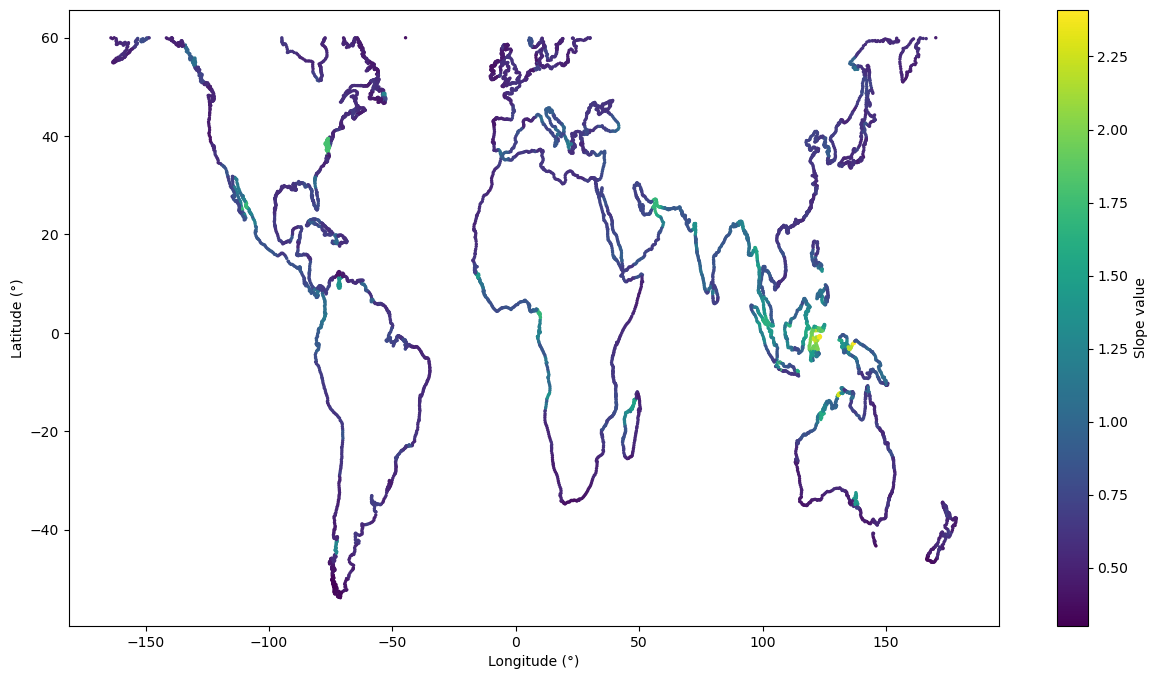

In [154]:
fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon, lat, c=np.mean(beta,axis=0),s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='Slope value')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')


plt.show()

In [155]:
# Set up des vagues [m] Mellet et al.

SU = 0.35*beta*np.sqrt(Hs*L_SU)
print("# - Set up are ok")

# - Set up are ok


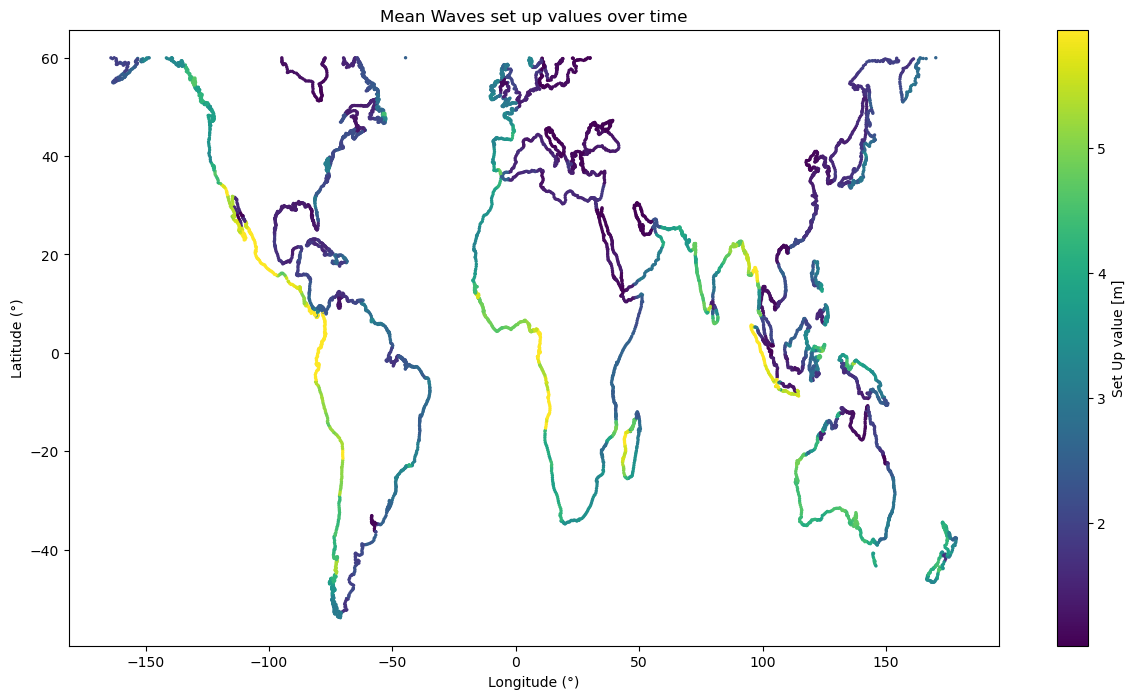

In [156]:
perc_5_SU = np.percentile(SU,5)
perc_95_SU = np.percentile(SU,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon, lat, c=np.mean(SU,axis=0),vmin=perc_5_SU,vmax=perc_95_SU,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='Set Up value [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean Waves set up values over time')

plt.show()

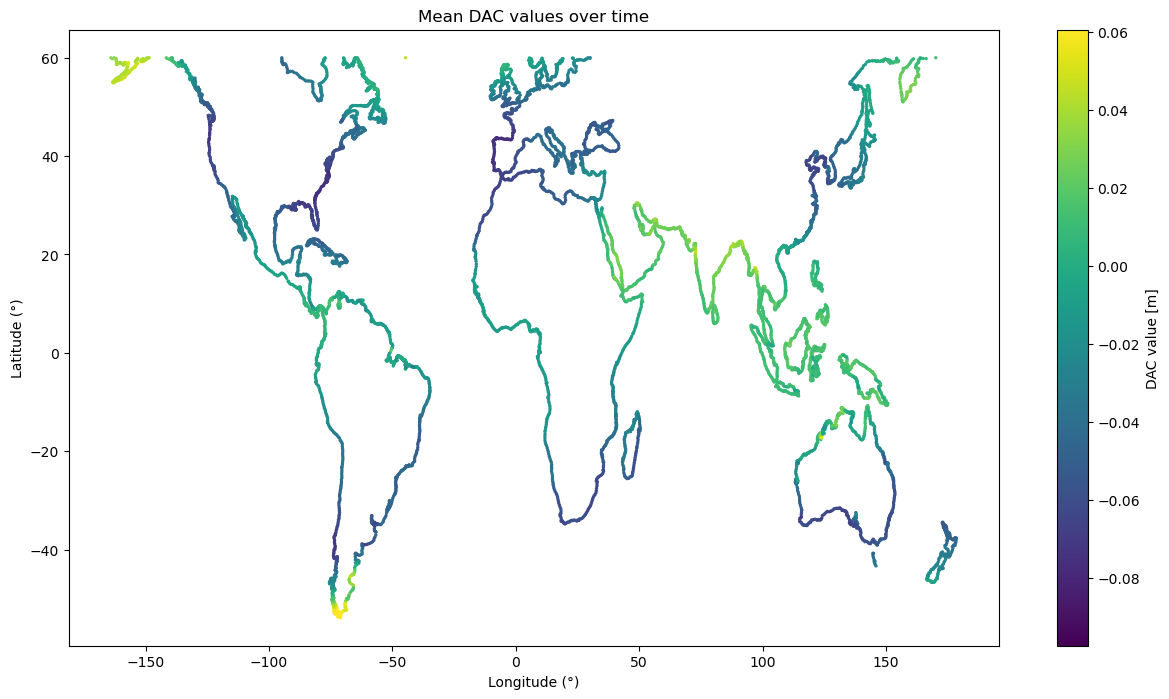

In [157]:
perc_5_dac = np.percentile(DAC,5)
perc_95_dac = np.percentile(DAC,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon, lat, c=np.mean(DAC,axis=0),vmin=perc_5_dac,vmax=perc_95_dac,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='DAC value [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean DAC values over time')

plt.show()

In [158]:
QrivD =FUNC.RIVDIS(RiverD,BQART)

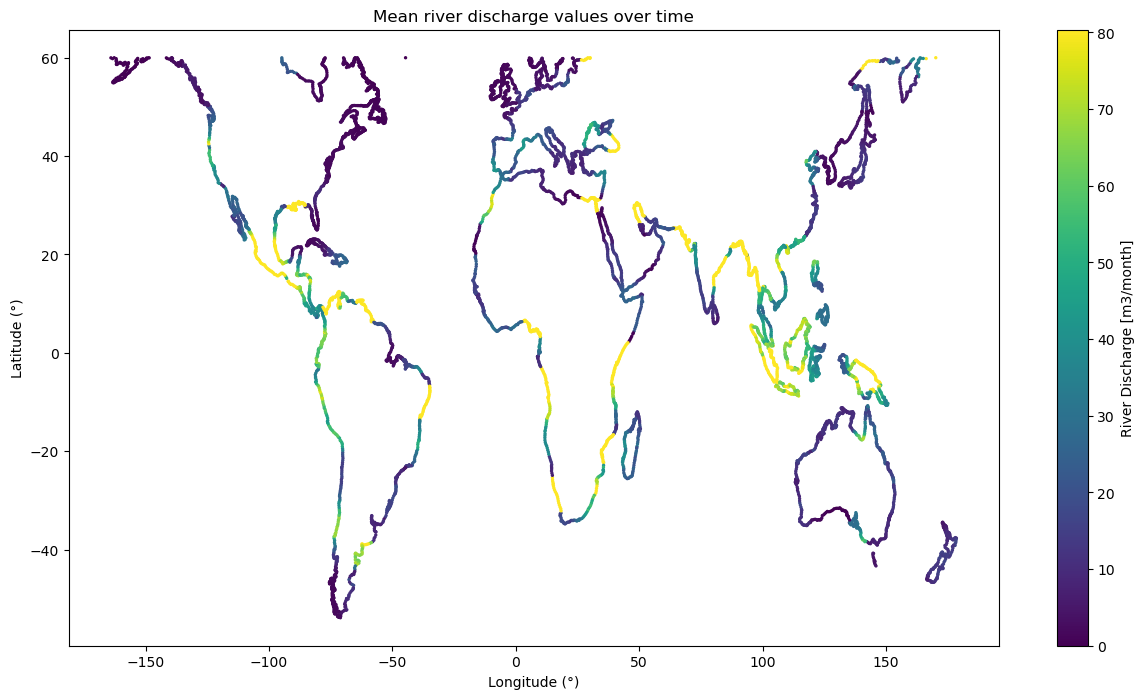

In [159]:
perc_5_rivD = np.percentile(QrivD,5)
perc_95_rivD = np.percentile(QrivD,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon, lat, c=FUNC.Wfilter(np.mean(QrivD,axis=0),lon,lat,4),vmin=perc_5_rivD,vmax=perc_95_rivD,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='River Discharge [m3/month]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean river discharge values over time')

plt.show()

# Regression linéaire SLA / RivDis pour voir le sphéric des rivieres

In [160]:
from sklearn.linear_model import LinearRegression
# Nombre de positions (nombre de colonnes dans vos tableaux 2D)
nombre_positions = RiverD.shape[1]

# Tableau pour stocker les coefficients et intercepts
resultats_regression = np.zeros((2, nombre_positions))

# Boucle pour calculer la régression pour chaque position
for position in range(nombre_positions):
    # Sélectionner les données pour la position actuelle
    x = RiverD[:, position].reshape(-1, 1)
    y = SLA[:, position]

    # Initialiser le modèle de régression linéaire
    modele = LinearRegression()

    # Adapter le modèle aux données
    modele.fit(x, y)

    # Stocker les coefficients et intercepts dans le tableau
    resultats_regression[0, position] = modele.coef_[0]
    resultats_regression[1, position] = modele.intercept_

# Afficher les résultats
print("Coefficients d'inclinaison pour chaque position :", resultats_regression[0, :])
print("Intercepts pour chaque position :", resultats_regression[1, :])

Coefficients d'inclinaison pour chaque position : [-1.89945790e-05  0.00000000e+00  0.00000000e+00 ... -1.68944185e-06
  0.00000000e+00  0.00000000e+00]
Intercepts pour chaque position : [0.05093129 0.04783398 0.04083504 ... 0.04636634 0.04597201 0.04895287]


In [161]:
spheric = resultats_regression[0]*RiverD + resultats_regression[1]

In [162]:
spheric.shape

(204, 8857)

# Affichage des données lat/lon 

On sait que chaque point est séparé de 0.8° donc des que j'ai plus de 0.8° entre mes couples lat/lon ca veut dire que j'ai un "trait"

In [163]:
index_deb, index_fin = FUNC.trouver_indice_section(lon, lat,0.8)

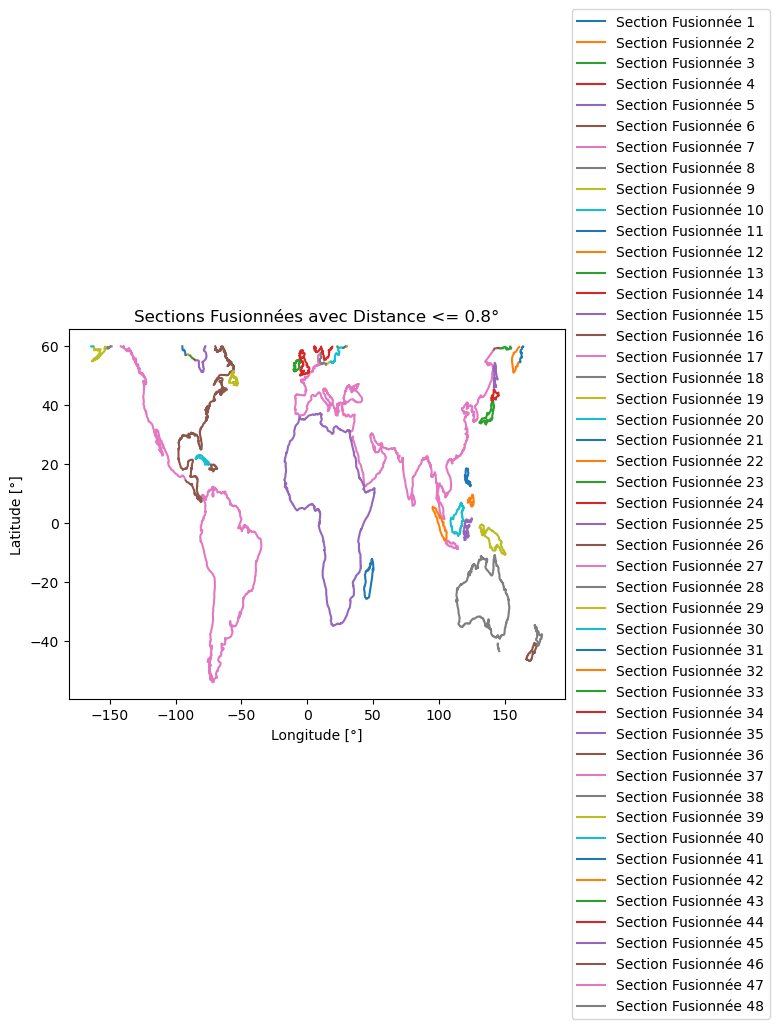

In [164]:
sections_fusionnees,indices_fusionnes = FUNC.fusionner_sections(index_deb, index_fin, lon, lat,0.8)
FUNC.afficher_sections_fusionnees(sections_fusionnees)

In [165]:
# Trouver les paires dont la différence est supérieure à deux
paires_filtrees = [(i, j) for i, j in indices_fusionnes if abs(i - j) > 2]

Résume : j'ai mes sections de travail, les indices correspondants 

To Do : déclaration des constantes / déclaration paramétres modele

## Déclaration des constantes modele

In [166]:
##### print("# - Initializing model constants")
#Space grid (km - m)
dx = 50000 

# Courant number --> on peux le changer comme on veut
c = 0.0000001 

Q0_mnthly_hyp = (10**5)/12 #m3/month

nu     = (2*Q0_mnthly_hyp)/DoC #m2/month

dt     = 1

#c*((0.5*(dx**2))/nu) #month

In [167]:
INDICES    = []

ANGLEINCID = []
KAMPHUIS   = []
XSHORE     = []
DXM        = []
DYM        = []
LONNEW     = []
LATNEW     = []
XNEW       = []
YNEW       = []

In [168]:
for i, section in enumerate(paires_filtrees):
    index_deb = section[0]
    index_fin = section[1]
    
    indices        = np.arange(index_deb, index_fin)
    
    lon_deg_init = lon[indices]
    lat_deg_init = lat[indices]
        
    lon_deg = lon_deg_init
    lat_deg = lat_deg_init
        
    #initialisation des valeurs
    T              = Tp[:,indices]
    H              = Hs[:,indices]
    AngleW         = np.deg2rad(Dir[:,indices])
    QrivD_mod      = QrivD[:,indices]
    SLA_mod        = SLA[:,indices]
    DAC_mod        = DAC[:,indices]
    SU_mod         = SU[:,indices]
    SLOPE_mod      = beta[:,indices]
    SPHERIC_mod    = spheric[:,indices]
    
    #stockage des valeurs initiales
    H_array         = np.zeros((len(indices),len(T)))
    T_array         = np.zeros((len(indices),len(T)))
    QRIV_array      = np.zeros((len(indices),len(T)))
    SLA_array       = np.zeros((len(indices),len(T)))
    ANGLE_array     = np.zeros((len(indices),len(T)))
    DAC_array       = np.zeros((len(indices),len(T)))
    SU_array        = np.zeros((len(indices),len(T)))
    SLOPE_array     = np.zeros((len(indices),len(T)))
    
    INDICES_array   = np.zeros(len(indices))
    INDICES_array   = indices
    
    #stockage des sorties
    ANGLEINCID_array= np.zeros((len(indices),len(T)))
    KAMP_array      = np.zeros((len(indices),len(T)))
    XSHORE_array   = np.zeros((len(indices),len(T)))
    
    DXM_array       = np.zeros((len(indices),len(T)))
    DYM_array       = np.zeros((len(indices),len(T)))
    
    LONNEW_array    = np.zeros((len(indices),len(T)))    
    LATNEW_array    = np.zeros((len(indices),len(T)))
    XNEW_array      = np.zeros((len(indices),len(T)))
    YNEW_array      = np.zeros((len(indices),len(T)))
    
    
    for t in range(len(T)):
        
        SLA_array[:,t]       = FUNC.Wfilter(SLA_mod[t,:],lon_deg,lat_deg,4)
        T_array[:,t]         = FUNC.Wfilter(T[t,:],lon_deg,lat_deg,4)
        H_array[:,t]         = FUNC.Wfilter(H[t,:],lon_deg,lat_deg,4)
        ANGLE_array[:,t]     = FUNC.Wfilter(AngleW[t,:],lon_deg,lat_deg,4)
        QRIV_array[:,t]      = FUNC.Wfilter(QrivD_mod[t,:],lon_deg,lat_deg,4)
        DAC_array[:,t]       = FUNC.Wfilter(DAC_mod[t,:],lon_deg,lat_deg,4)
        SU_array[:,t]        = FUNC.Wfilter(SU_mod[t,:],lon_deg,lat_deg,4)
        SLOPE_array[:,t]     = FUNC.Wfilter(SLOPE_mod[t,:],lon_deg,lat_deg,4)
        
        
        diff_latitudes = np.diff(lat_deg)
        diff_longitudes = np.diff(lon_deg)

        # Ajout du dernier point aux différences

        diff_latitudes = np.append(diff_latitudes, lat_deg[-1] - lat_deg[-2])
        diff_longitudes = np.append(diff_longitudes, lon_deg[-1] - lon_deg[-2])

        # Calcul de l'angle phi d'incidence a la cote à partir des différences

        phic = 2 * np.pi - np.arctan2(diff_latitudes, diff_longitudes)
        
        philoc_dir = np.arctan2(np.sin(phic%360- ANGLE_array[:,t]),np.cos(phic%360-ANGLE_array[:,t]))
        philoc_dirc = (philoc_dir + np.pi/2) % np.pi - np.pi/2
        
        #resulting_angle_deg  = FUNC.calculate_angles(lat_deg, lon_deg)
        #angles_mod           = resulting_angle_deg - ANGLE_array[:,t]                    # --> degres   
        
        ANGLEINCID_array[:,t] = philoc_dirc    #radians
        
                # Longshore transport rate (dry mass kg/sec)
        
        KAMP_mass    = 2.33 * (rohs / (rohs - roh)) * (T_array[:,t] ** 1.5) * (SLOPE_array[:,t]** 0.75) * (d50 ** -0.25) * (H_array[:,t]** 2) * (np.abs(np.sin(2 * philoc_dirc))**0.6 * np.sign(philoc_dirc)) ##kg/s
        KAMP_vol_yr  = 365 * 24 * 60 * 60 * (KAMP_mass / (rohs - roh)) / (1.0 - poro)
        KAMP         = KAMP_vol_yr/12

        KAMP_array[:,t] = KAMP
        
        x_m = (6371) * np.cos(np.radians(lat_deg)) * np.radians(lon_deg) #lon
        y_m = (6371) * np.radians(lat_deg)

        L = np.sqrt((np.roll(x_m, 1) - np.roll(x_m, -1))**2+(np.roll(y_m, 1) - np.roll(y_m, -1))**2)

            # Calculate the difference between KAMP[i] and KAMP[i+1]
        budget = KAMP[:-1] - KAMP[1:]
        budget = np.insert(budget, 0, KAMP[0])
         
        dKdt   = budget / (50000*DoC)
        dQrdt  = QRIV_array[:,t]/(50000*DoC)
        
        SLA_term = SLA_array[:,t]+DAC_array[:,t]+SU_array[:,t]+SPHERIC_mod[t,:]
        
        dXshoredtNE      = dKdt + dQrdt + (SLA_term/SLOPE_array[:,t])  #m/mois
        dXshoredt        = dXshoredtNE #- 0.03*(dKdt+dQrdt)
        
        Xshore        = dXshoredt * dt 
        
        XSHORE_array[:,t] = Xshore
            
        # Report des modifications sur mes coordonnées
        
        dx_m = - Xshore * (np.roll(y_m, 1) - np.roll(y_m, -1))/L
        dy_m =   Xshore * (np.roll(x_m,1)  - np.roll(x_m,-1))/L
        
        DXM_array[:,t] = dx_m
        DYM_array[:,t] = dy_m
            
        x_new = x_m + dx_m
        y_new = y_m + dy_m
        
        XNEW_array[:,t] = x_new
        YNEW_array[:,t] = y_new
        
        lat_deg = np.degrees(y_new / (6371))
        lon_deg = np.degrees(x_new / (6371  * np.cos(np.radians(lat_deg))))
        
        LONNEW_array[:,t] = lon_deg
        LATNEW_array[:,t] = lat_deg
        
        
    
    INDICES.append(INDICES_array)
    
    ANGLEINCID.append(ANGLEINCID_array)

    KAMPHUIS.append(KAMP_array)
    XSHORE.append(XSHORE_array)
    DXM.append(DXM_array)
    DYM.append(DYM_array)
    LONNEW.append(LONNEW_array)
    LATNEW.append(LATNEW_array)
    XNEW.append(XNEW_array)
    YNEW.append(YNEW_array)

# CONCATENATION DES DONNEES POUR ETUDE STATISTIQUES

In [169]:
INDICES_concat  = np.concatenate(INDICES,axis=0)
incid_concat    = np.concatenate(ANGLEINCID,axis=0)
K_concat        = np.concatenate(KAMPHUIS,axis=0)
Xshore_concat   = np.concatenate(XSHORE,axis=0)
dxm_concat       = np.concatenate(DXM,axis=0)
dym_concat       = np.concatenate(DYM,axis=0)
lon_new_concat   = np.concatenate(LONNEW,axis=0)
lat_new_concat   = np.concatenate(LATNEW,axis=0)
x_new_concat     = np.concatenate(XNEW,axis=0)
y_new_concat     = np.concatenate(YNEW,axis=0)

# DETREND

In [170]:
print(Xshores.shape)

(8841, 204)


In [171]:
index_to_drop = 6736
if index_to_drop < Xshores.shape[0]:
    Xshores = np.delete(Xshores, index_to_drop, axis=0)
    latX    = np.delete(latX,index_to_drop,axis=0)
    lonX    = np.delete(lonX,index_to_drop,axis=0)
else:
    print(f"Index {index_to_drop} is out of bounds for the array.")

In [172]:
def detrend_linear_2d_along_time(data):
    detrended_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        x = np.arange(data.shape[1])
        slope, intercept = np.polyfit(x, data[i, :], 1)
        detrended_data[i, :] = data[i, :] - (slope * x + intercept)
    return detrended_data

In [173]:
detrended_KAMPHUIS = detrend_linear_2d_along_time(K_concat)
detrended_Xshore   = detrend_linear_2d_along_time(Xshore_concat)
detrended_dxm      = detrend_linear_2d_along_time(dxm_concat)
detrended_dym      = detrend_linear_2d_along_time(dym_concat)
detrended_val      = detrend_linear_2d_along_time(Xshores)

In [174]:
print(detrended_val.shape)

(8840, 204)


# AFFICHAGE DES RESULTATS

In [175]:
lat_glob = lat[INDICES_concat]
lon_glob = lon[INDICES_concat]

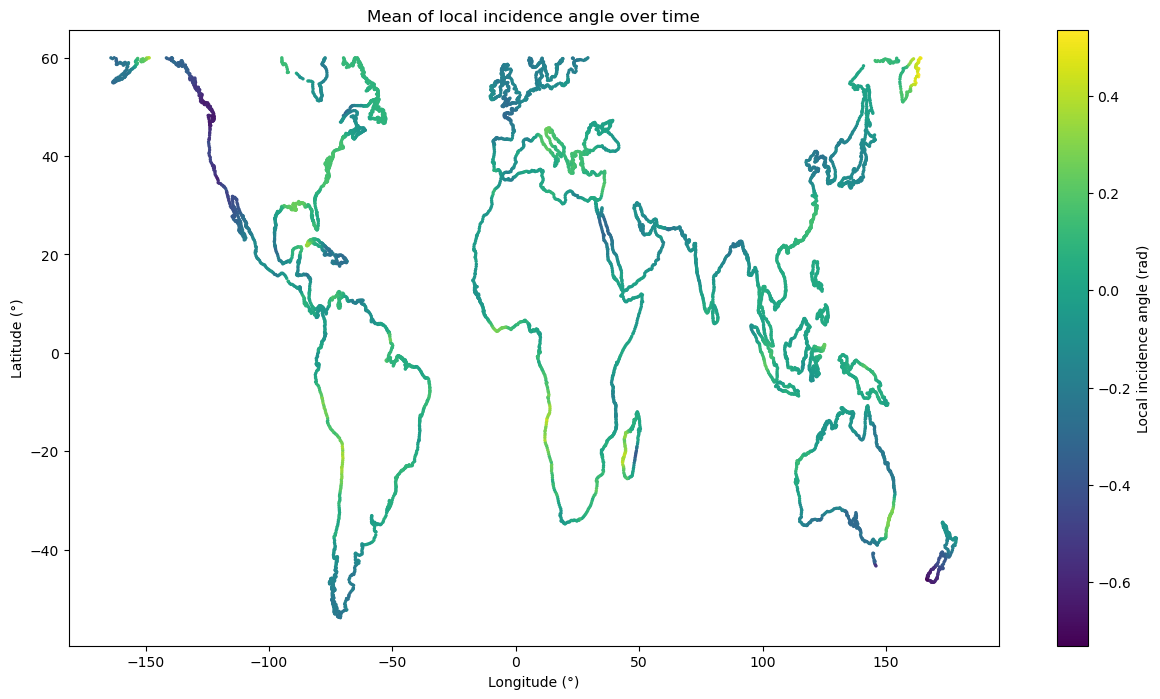

In [176]:
fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(incid_concat,axis=1),lon_glob,lat_glob,4),s=2)
cbar = plt.colorbar(sc, ax=ax, label='Local incidence angle (rad)')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean of local incidence angle over time')

plt.show()

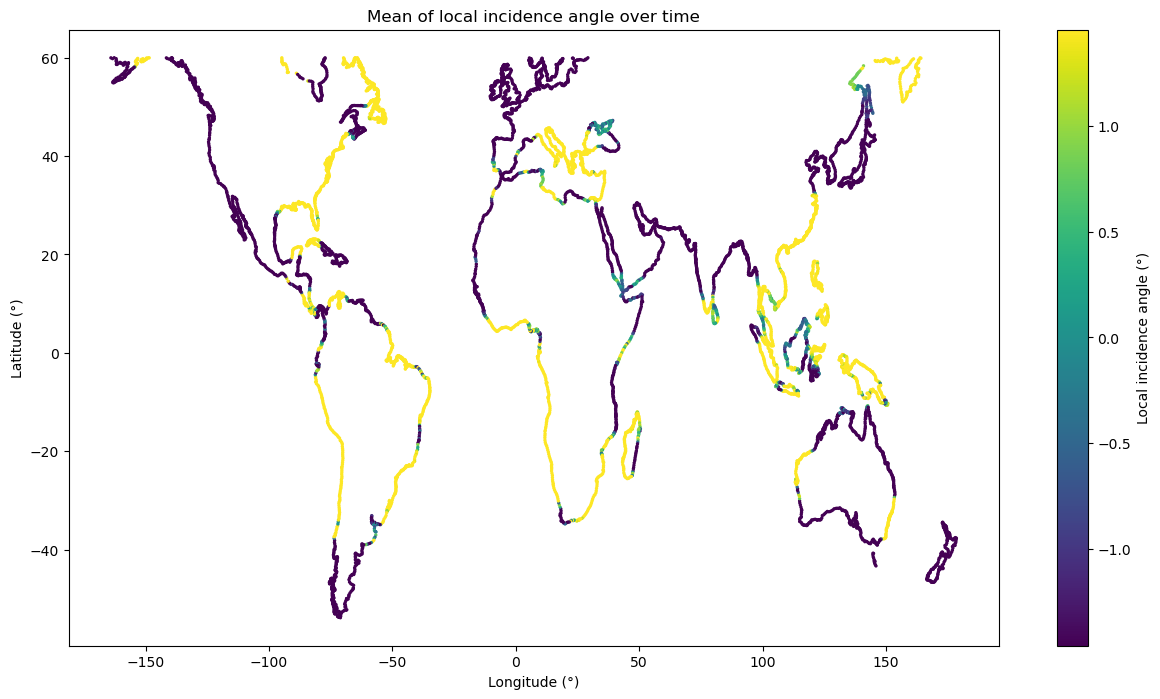

In [177]:
perc_5_angle = np.percentile(incid_concat,5)
perc_95_angle = np.percentile(incid_concat,95)


fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(np.rad2deg(incid_concat),axis=1),lon_glob,lat_glob,4),vmin=perc_5_angle,vmax=perc_95_angle,s=2)
cbar = plt.colorbar(sc, ax=ax, label='Local incidence angle (°)')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean of local incidence angle over time')

plt.show()

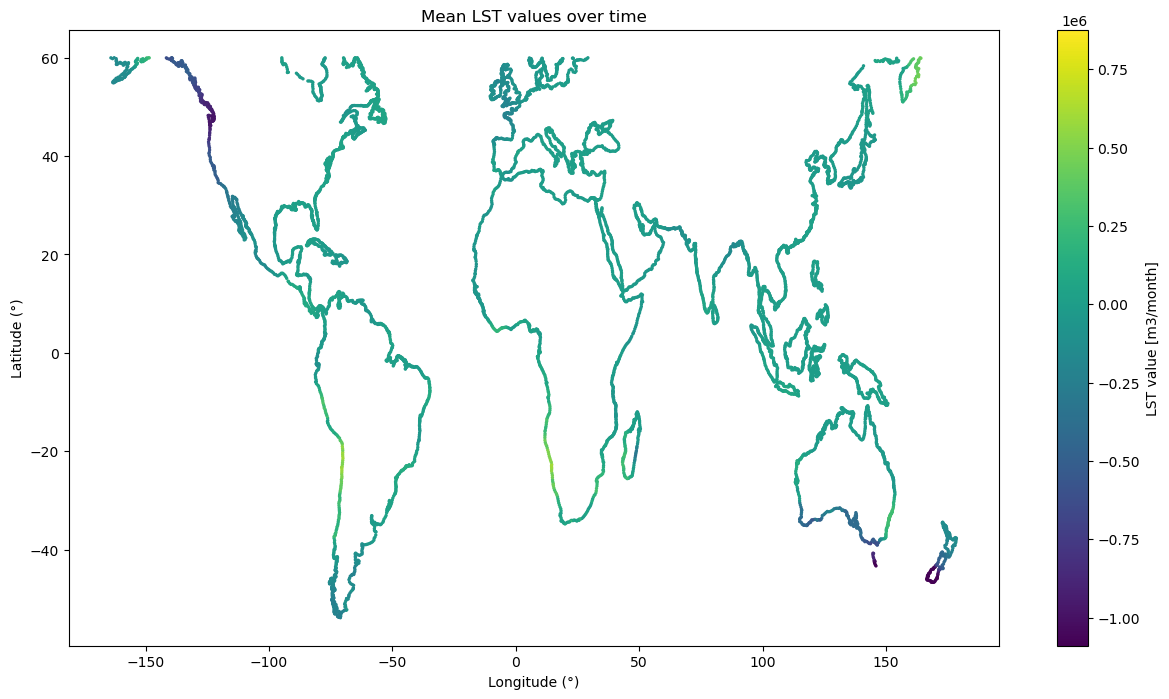

In [178]:
perc_5_lst = np.percentile(K_concat,5)
perc_95_lst = np.percentile(K_concat,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(K_concat,axis=1),lon_glob,lat_glob,4),vmin=perc_5_lst,vmax=perc_95_lst,s=2)
cbar = plt.colorbar(sc, ax=ax, label='LST value [m3/month]')

ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean LST values over time')

plt.show()

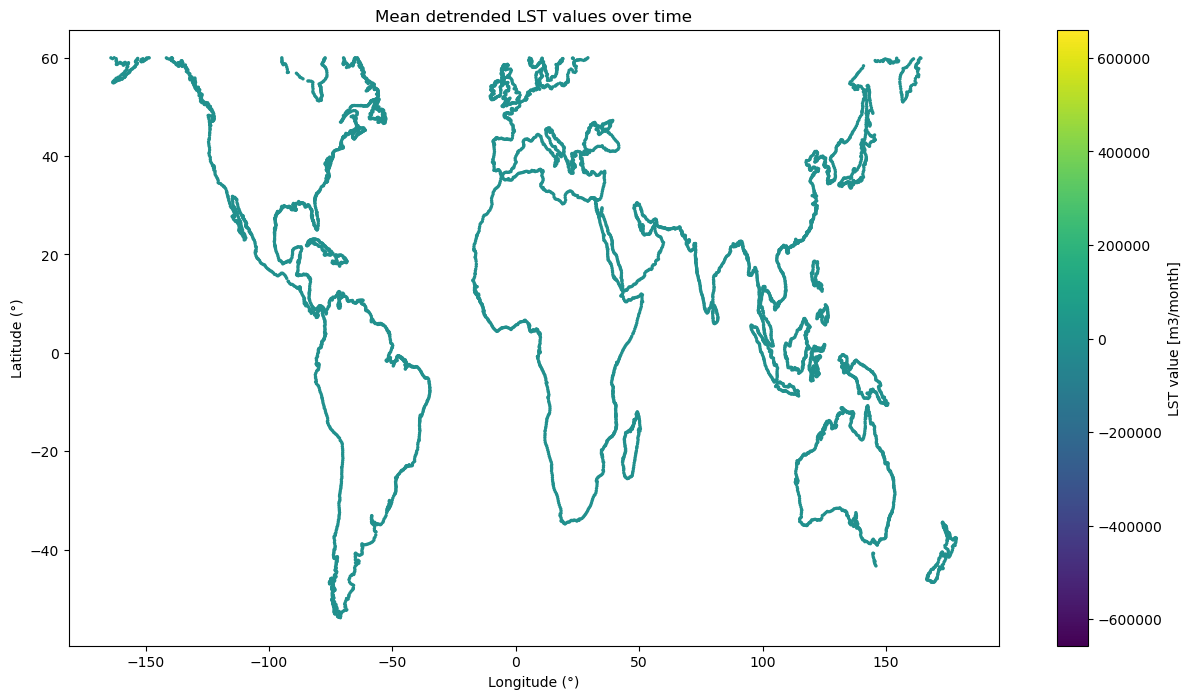

In [179]:
perc_5_lstd = np.percentile(detrended_KAMPHUIS,5)
perc_95_lstd = np.percentile(detrended_KAMPHUIS,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(detrended_KAMPHUIS,axis=1),lon_glob,lat_glob,4),vmin=perc_5_lstd,vmax=perc_95_lstd,s=2)
cbar = plt.colorbar(sc, ax=ax, label='LST value [m3/month]')

ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean detrended LST values over time')

plt.show()

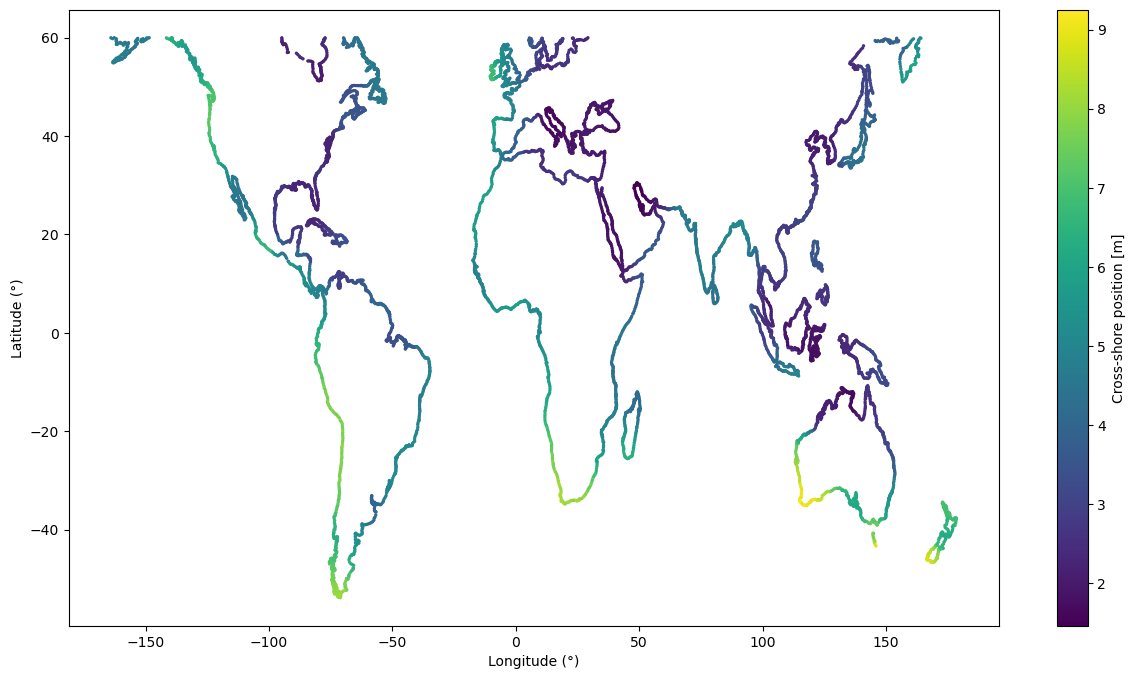

In [180]:
perc_5_xshore = np.percentile(Xshore_concat,5)
perc_95_xshore = np.percentile(Xshore_concat,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(Xshore_concat,axis=1),lon_glob,lat_glob,4),s=2) #,vmin=perc_5_xshore,vmax=perc_95_xshore,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='Cross-shore position [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
#ax.set_title('Mean Xshores values over time')

plt.show()

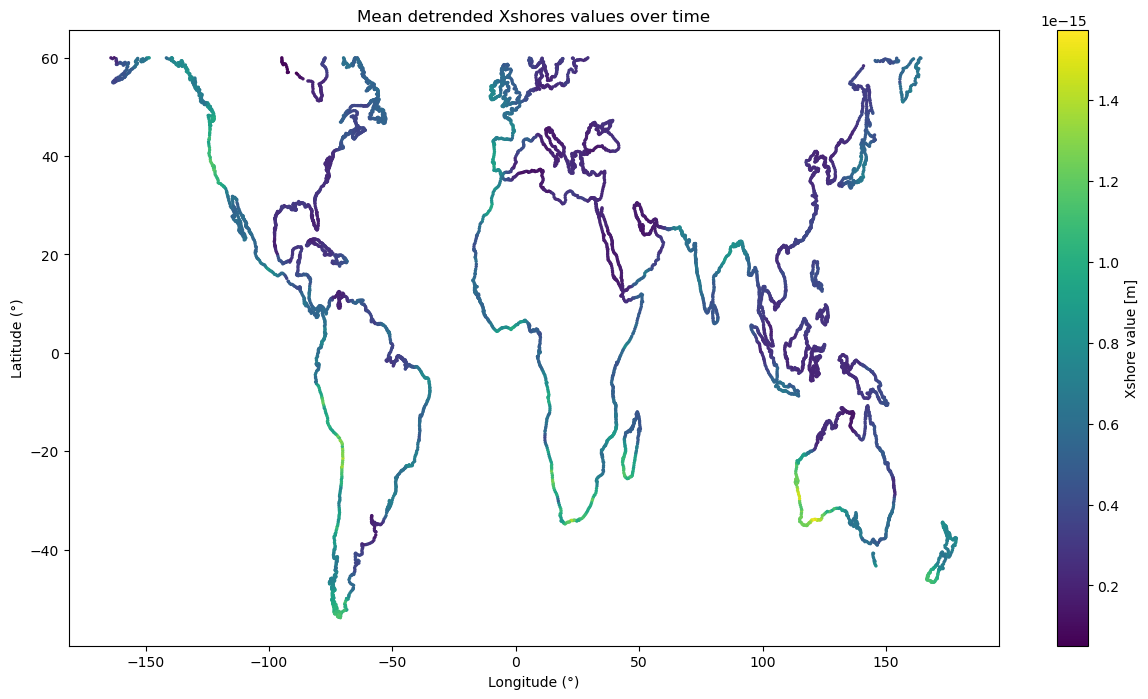

In [181]:
perc_5_xshored = np.percentile(detrended_Xshore,5)
perc_95_xshored = np.percentile(detrended_Xshore,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(detrended_Xshore,axis=1),lon_glob,lat_glob,4),s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='Xshore value [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean detrended Xshores values over time')

plt.show()

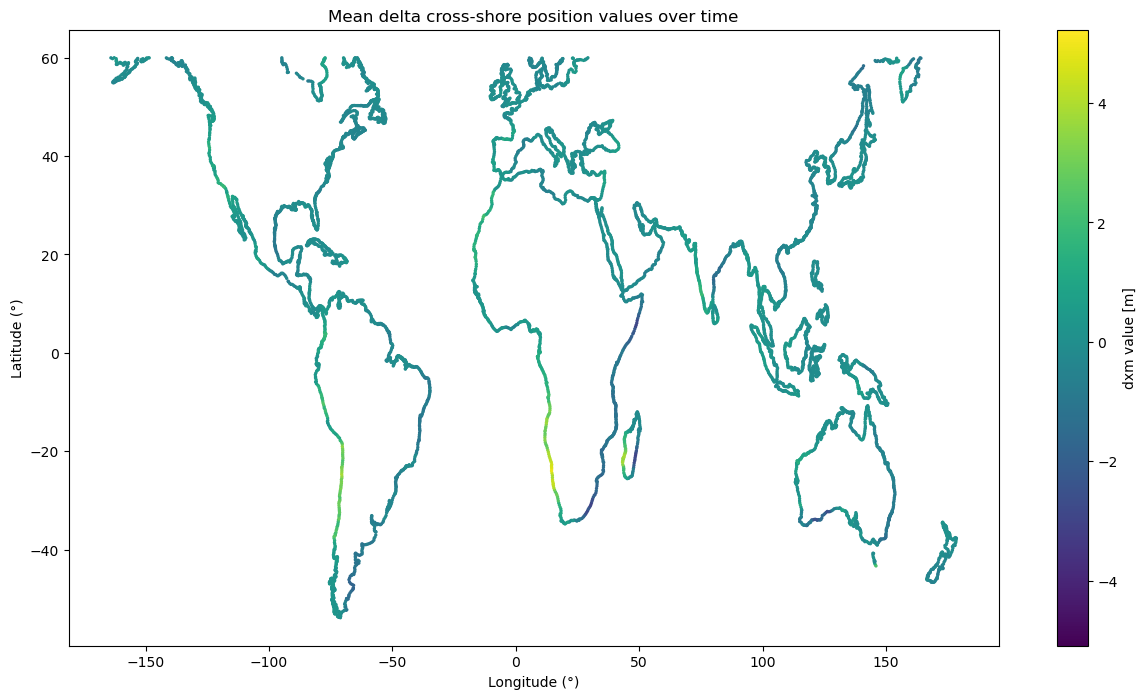

In [182]:
perc_5_dx = np.percentile(dxm_concat,5)
perc_95_dx = np.percentile(dxm_concat,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(dxm_concat,axis=1),lon_glob,lat_glob,4),vmin=perc_5_dx,vmax=perc_95_dx,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='dxm value [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean delta cross-shore position values over time')

plt.show()

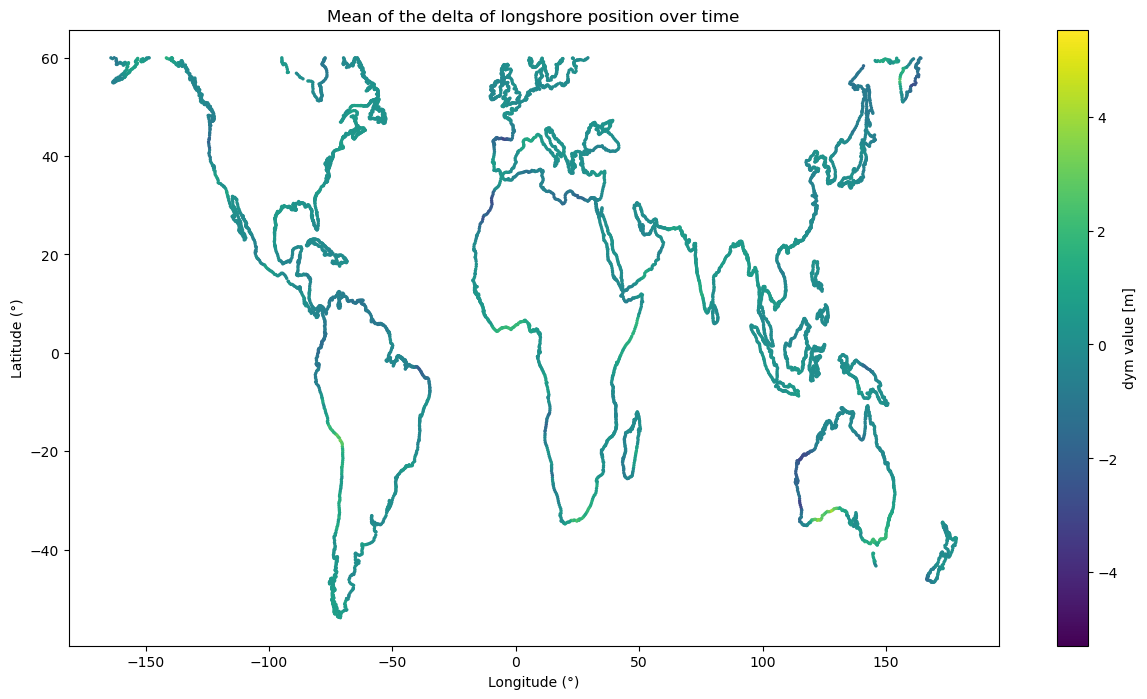

In [183]:
perc_5_dy = np.percentile(dym_concat,5)
perc_95_dy = np.percentile(dym_concat,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=FUNC.Wfilter(np.mean(dym_concat,axis=1),lon_glob,lat_glob,4),vmin=perc_5_dy,vmax=perc_95_dy,s=2)
# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='dym value [m]')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Mean of the delta of longshore position over time')

plt.show()

# MAP DES AMPLITUDES

In [184]:
amplitude_mod = []
amplitude_obs = []
for i in range(len(x_new_concat)):
    amplitude = 4 * np.std(detrended_Xshore[i])
    amplitude_mod.append(amplitude)
    amplitudeobs = 4 * np.std(detrended_val[i])
    amplitude_obs.append(amplitudeobs)

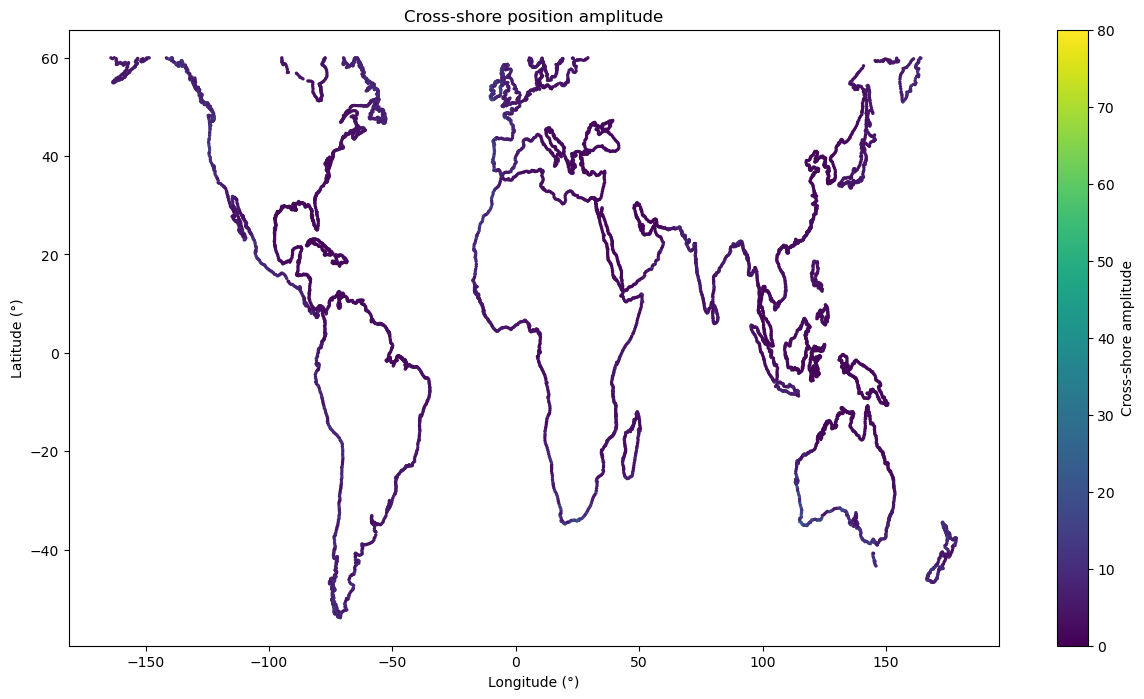

In [185]:
perc_5_mod = np.percentile(amplitude_mod,5)
perc_95_mod= np.percentile(amplitude_mod,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc1 = ax.scatter(lon_glob, lat_glob, c=amplitude_mod,vmin=0,vmax=80,s=2)

# Ajoutez une colorbar
cbar1 = plt.colorbar(sc1, ax=ax, label='Cross-shore amplitude')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Cross-shore position amplitude')

plt.show()

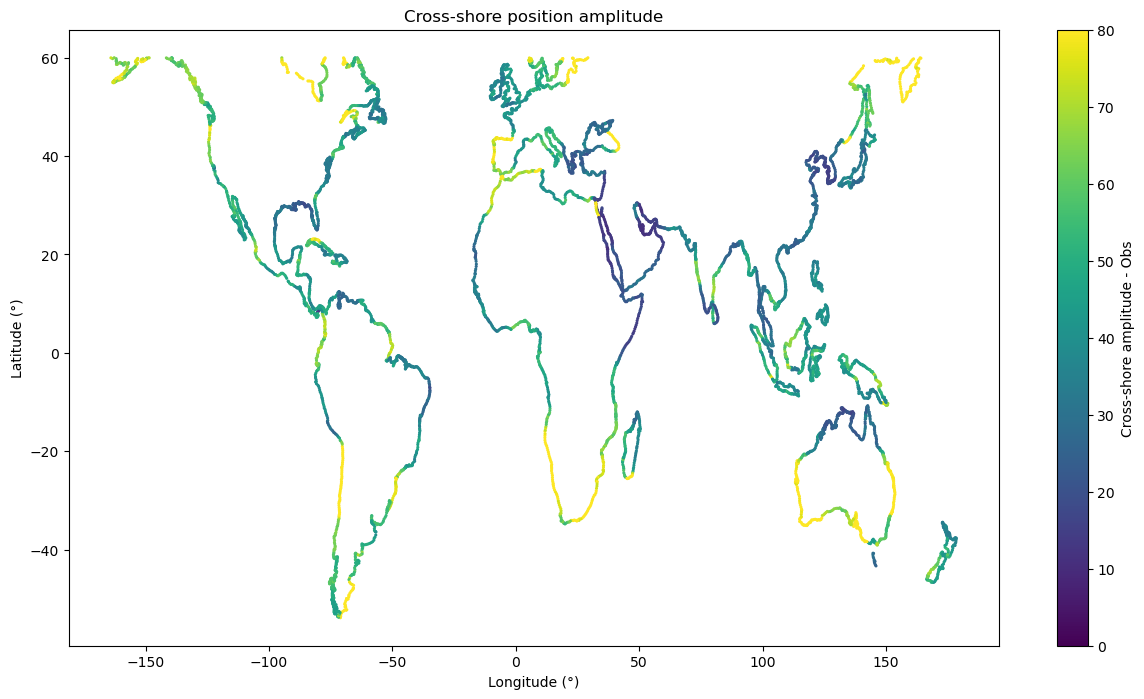

In [186]:
perc_5_obs = np.percentile(amplitude_obs,5)
perc_95_obs= np.percentile(amplitude_obs,95)

fig, ax = plt.subplots(figsize=(15, 8))
sc1 = ax.scatter(lon_glob, lat_glob, c=amplitude_obs,vmin=0,vmax=80,s=1.5)

# Ajoutez une colorbar
cbar2 = plt.colorbar(sc1,ax=ax,label='Cross-shore amplitude - Obs')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
ax.set_title('Cross-shore position amplitude')

plt.show()

# INTERPOLATION LINEAIRE SUR MES OUTPUTS POUR COLLER AUX LAT/LON DE Xshores

In [187]:
print(len(detrended_Xshore))

8840


In [188]:
interpolated_Xshore_output = []

for t in range(len(detrended_Xshore[0])):
    data            = pd.DataFrame({'lat':lat_glob,'lon':lon_glob,'Xshore': detrended_Xshore[:,t]}) 
    points          = data[['lat','lon']].values
    values_xshore   = data['Xshore'].values
    
               
    # Utilisation de la fonction griddata pour l'interpolation bilinéaire
    interpolated_values_xshore = griddata(points, values_xshore, (latX, lonX), method='nearest')
    
    # Ajouter les valeurs interpolées à la liste
    interpolated_Xshore_output.append(interpolated_values_xshore)

# Convertir la liste en un tableau NumPy
interpolated_Xshore_output = np.array(interpolated_Xshore_output)


In [189]:
print(interpolated_Xshore_output.shape)
Xshore_interpol = interpolated_Xshore_output.reshape((204, 8840))
print(Xshore_interpol.shape)

(204, 8840, 1)
(204, 8840)


SERIES TEMPORELLES

In [190]:
months = 204
start_year = 2000

1. CHILI

In [191]:
index_deb_AS, index_fin_AS = indices_fusionnes[26]
indices_AS = np.arange(index_deb_AS,index_fin_AS)
print(indices_fusionnes[26])

(5027, 6075)


Text(0, 0.5, 'Latitude(°)')

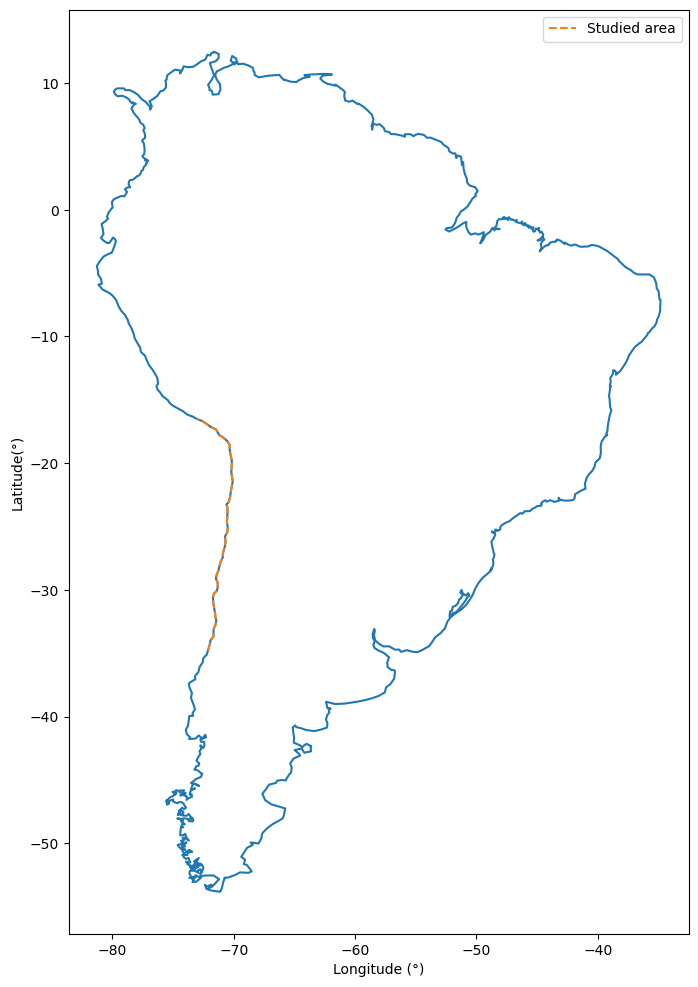

In [192]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.plot(lonX[indices_AS],latX[indices_AS])
plt.plot(lonX[5265:5320],latX[5265:5320],linestyle='--',label='Studied area')

plt.legend()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude(°)')

In [193]:
serie_chili_mod      = np.mean(Xshore_interpol[:,5265:5320],axis=1)
Serie_tempo_obs      = np.mean(detrended_val[5265:5320],axis=0)


In [194]:
corr = np.corrcoef(serie_chili_mod,Serie_tempo_obs)[0][1]
rmse = PYSTATS.COMP_RMSE(Serie_tempo_obs,serie_chili_mod)

In [195]:
print(corr)
print(rmse)

0.17835696767587053
16.04431730798408


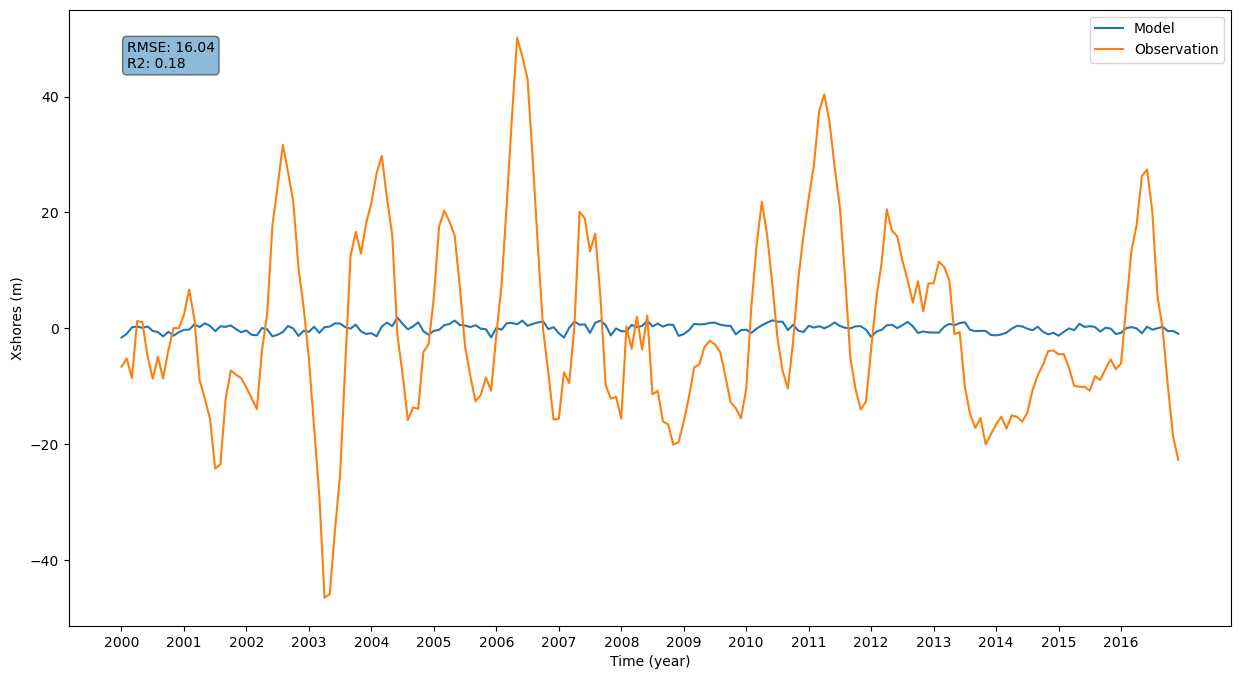

In [196]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), serie_chili_mod, label='Model')
plt.plot(range(months), Serie_tempo_obs, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse:.2f}\nR2: {corr:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Xshores (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

Text(0, 0.5, 'Xshores (m)')

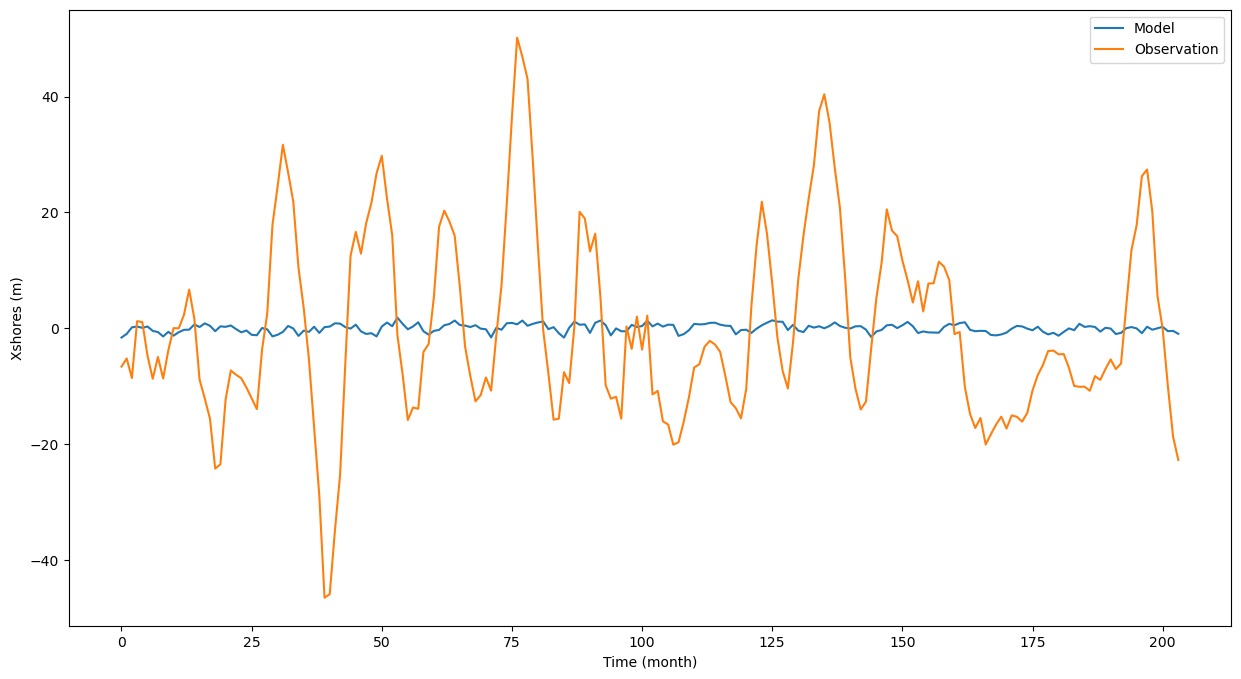

In [197]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(len(SLA)),serie_chili_mod,label='Model')
plt.plot(range(len(SLA)),Serie_tempo_obs,label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#textstr = f'RMSE: {rmse:.2f}\nR2: {corr:.2f}'
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (month)')
plt.ylabel('Xshores (m)')
#plt.title('Temporal series of detrended Xshore')

2. Afrique du Nord

In [198]:
index_deb_AN, index_fin_AN = indices_fusionnes[14]
indices_AN = np.arange(index_deb_AN,index_fin_AN)
print(indices_fusionnes[14])

(2393, 3225)


Text(0, 0.5, 'Latitude(°)')

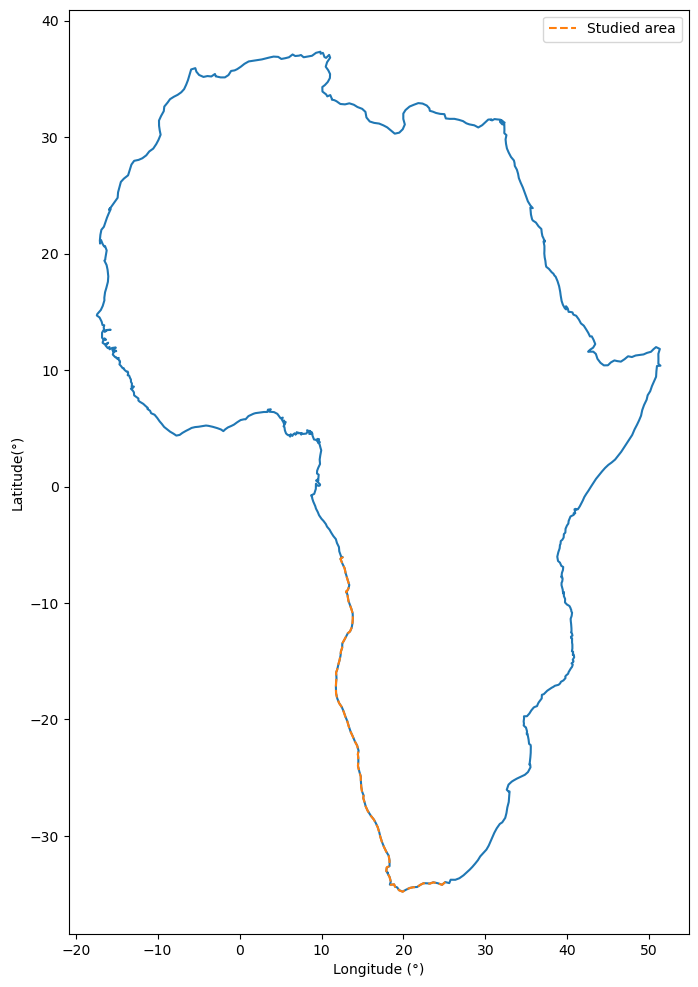

In [199]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.plot(lon[indices_AN],lat[indices_AN])
plt.plot(lonX[2700:2800],latX[2700:2800],linestyle='--',label='Studied area')

plt.legend()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude(°)')

In [200]:
Serie_tempo_afd      = np.mean(Xshore_interpol[:,2700:2800],axis=1)
Serie_tempo_obs_afd   = np.mean(detrended_val[2700:2800],axis=0)

In [201]:
corr_afd = np.corrcoef(Serie_tempo_obs_afd,Serie_tempo_afd)[0][1]
rmse_afd = PYSTATS.COMP_RMSE(Serie_tempo_obs_afd,Serie_tempo_afd)

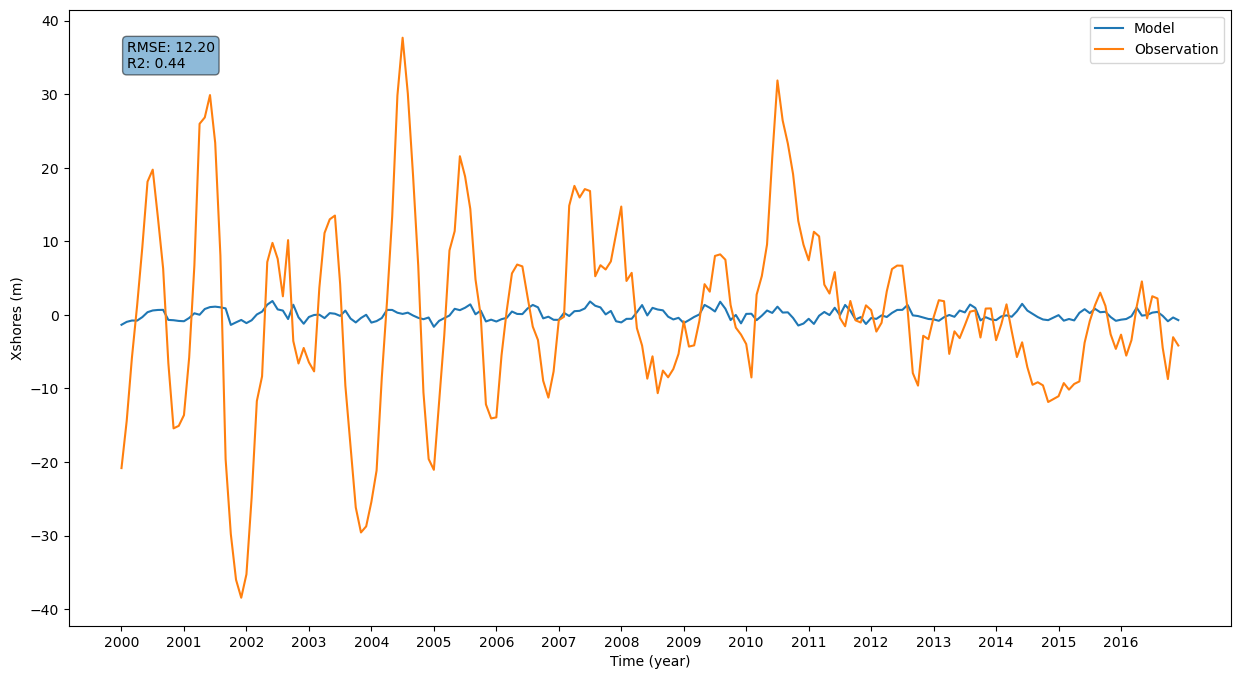

In [202]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), Serie_tempo_afd, label='Model')
plt.plot(range(months), Serie_tempo_obs_afd, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse_afd:.2f}\nR2: {corr_afd:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Xshores (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

3. Amerique du Nord - NYC

In [203]:
index_deb_AdN, index_fin_AdN = indices_fusionnes[25]
indices_AdN = np.arange(index_deb_AdN,index_fin_AdN)
print(indices_fusionnes[25])

(4038, 5027)


Text(0, 0.5, 'Latitude(°)')

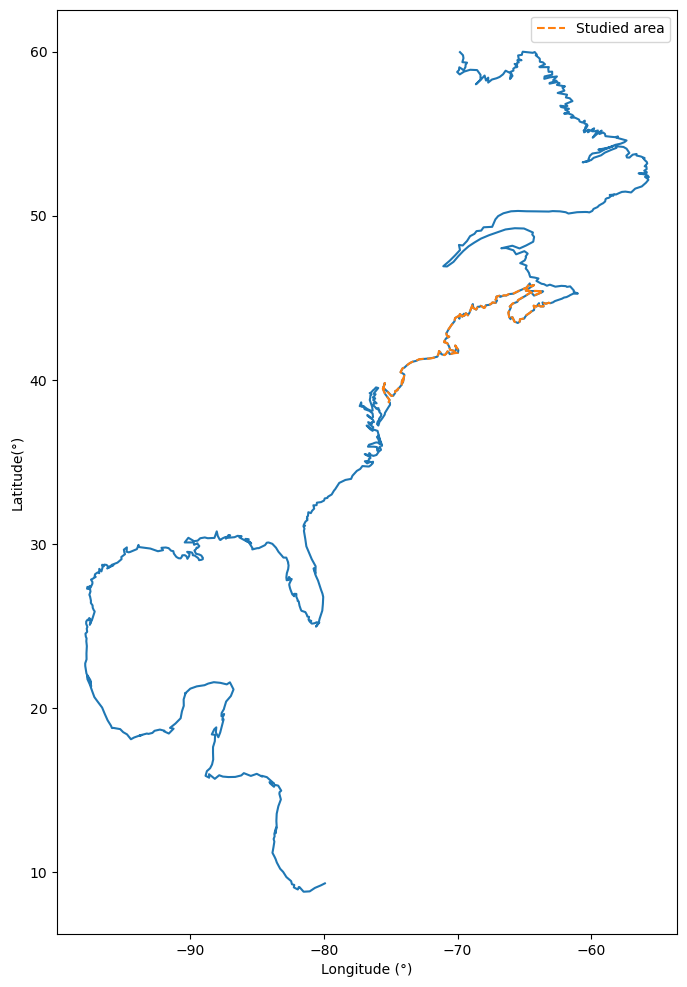

In [204]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.plot(lon[indices_AdN],lat[indices_AdN])
plt.plot(lonX[4350:4500],latX[4350:4500],linestyle='--',label='Studied area')

plt.legend()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude(°)')

In [205]:
Serie_tempo_US      = np.mean(Xshore_interpol[:,4350:4500],axis=1)
Serie_tempo_obs_US   = np.mean(detrended_val[4350:4500],axis=0)

In [206]:
corr_US = np.corrcoef(Serie_tempo_US,Serie_tempo_obs_US)[0][1]
rmse_US = PYSTATS.COMP_RMSE(Serie_tempo_obs_US,Serie_tempo_US)

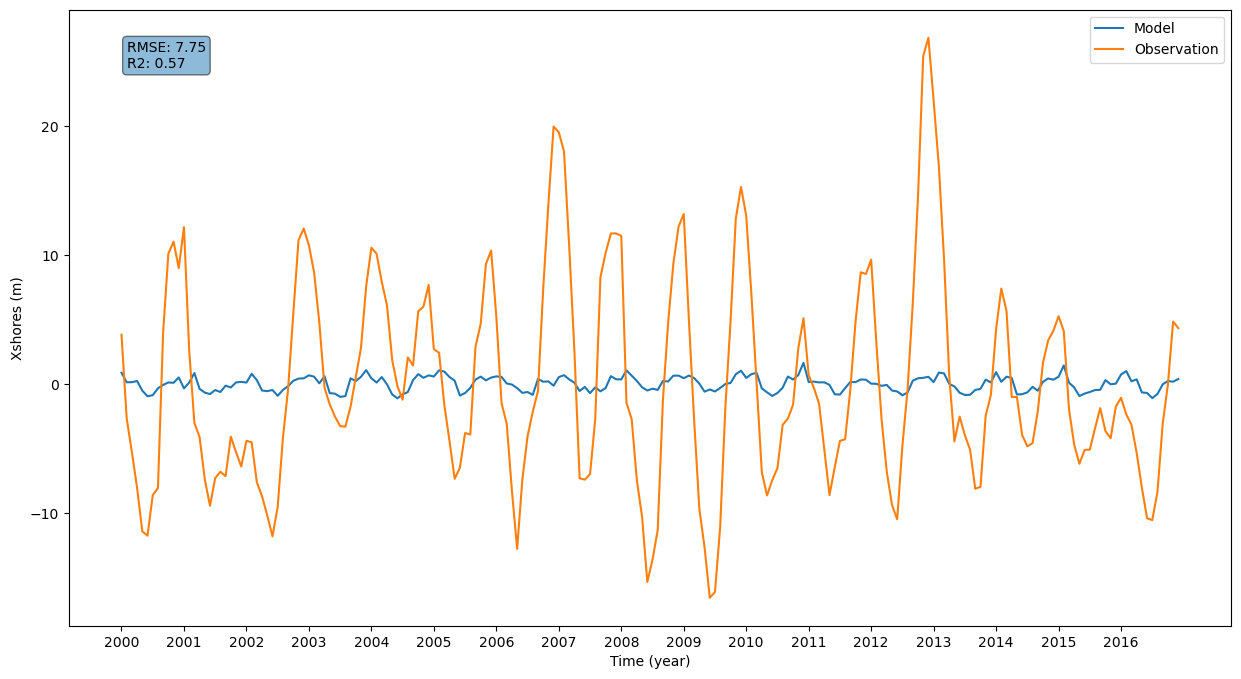

In [207]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), Serie_tempo_US, label='Model')
plt.plot(range(months), Serie_tempo_obs_US, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse_US:.2f}\nR2: {corr_US:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Xshores (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

In [208]:
index_deb_AU, index_fin_AU = indices_fusionnes[27]
indices_AU = np.arange(index_deb_AU,index_fin_AU)
print(indices_fusionnes[27])

(6075, 6736)


Text(0, 0.5, 'Latitude(°)')

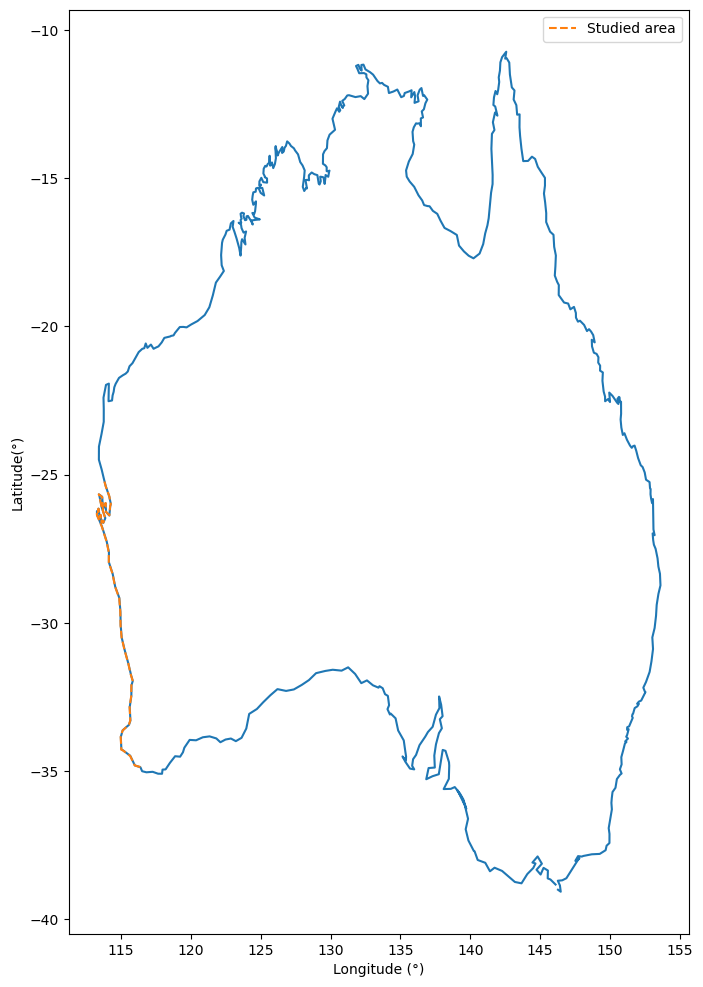

In [209]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.plot(lon[indices_AU],lat[indices_AU])
plt.plot(lonX[6200:6250],latX[6200:6250],linestyle='--',label='Studied area')

plt.legend()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude(°)')

In [210]:
Serie_tempo_AU      = np.mean(Xshore_interpol[:,6200:6250],axis=1)
Serie_tempo_obs_AU   = np.mean(detrended_val[6200:6250],axis=0)

In [211]:
corr_AU = np.corrcoef(Serie_tempo_AU,Serie_tempo_obs_AU)[0][1]
rmse_AU = PYSTATS.COMP_RMSE(Serie_tempo_obs_AU,Serie_tempo_AU)

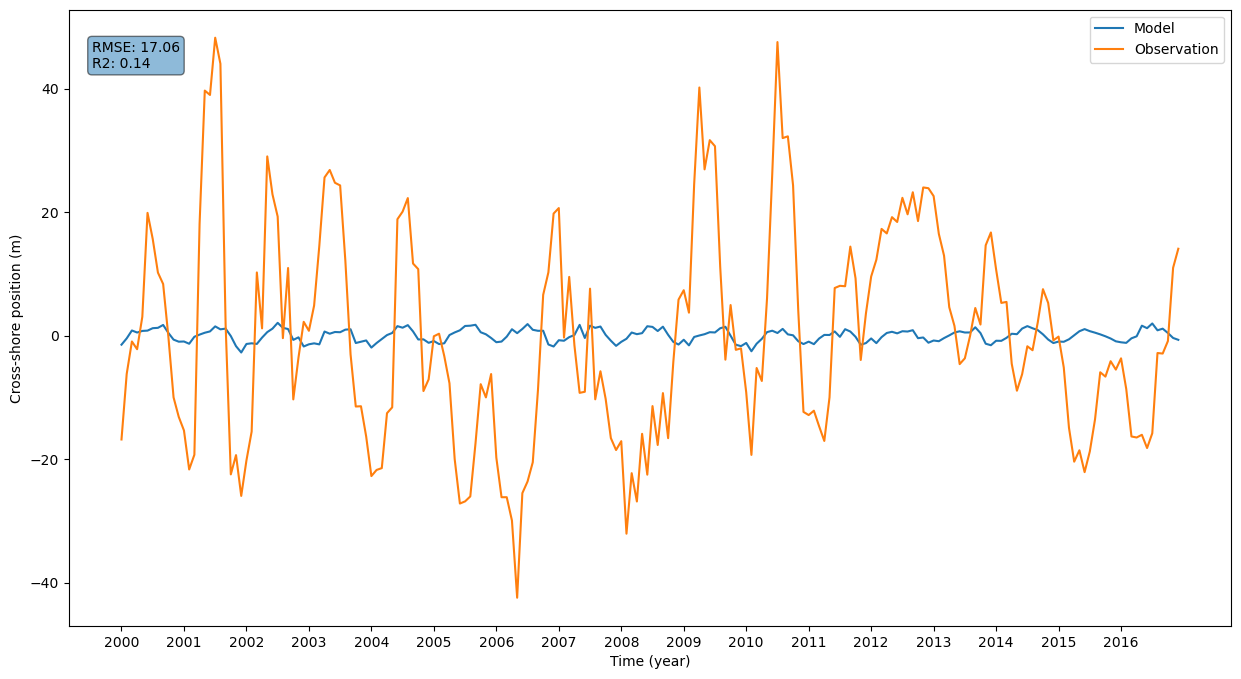

In [212]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), Serie_tempo_AU, label='Model')
plt.plot(range(months), Serie_tempo_obs_AU, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse_AU:.2f}\nR2: {corr_AU:.2f}'
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Cross-shore position (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

In [213]:
index_deb_RU, index_fin_RU = indices_fusionnes[6]
indices_RU = np.arange(index_deb_RU,index_fin_RU)
print(indices_fusionnes[6])

(111, 2157)


Text(0, 0.5, 'Latitude(°)')

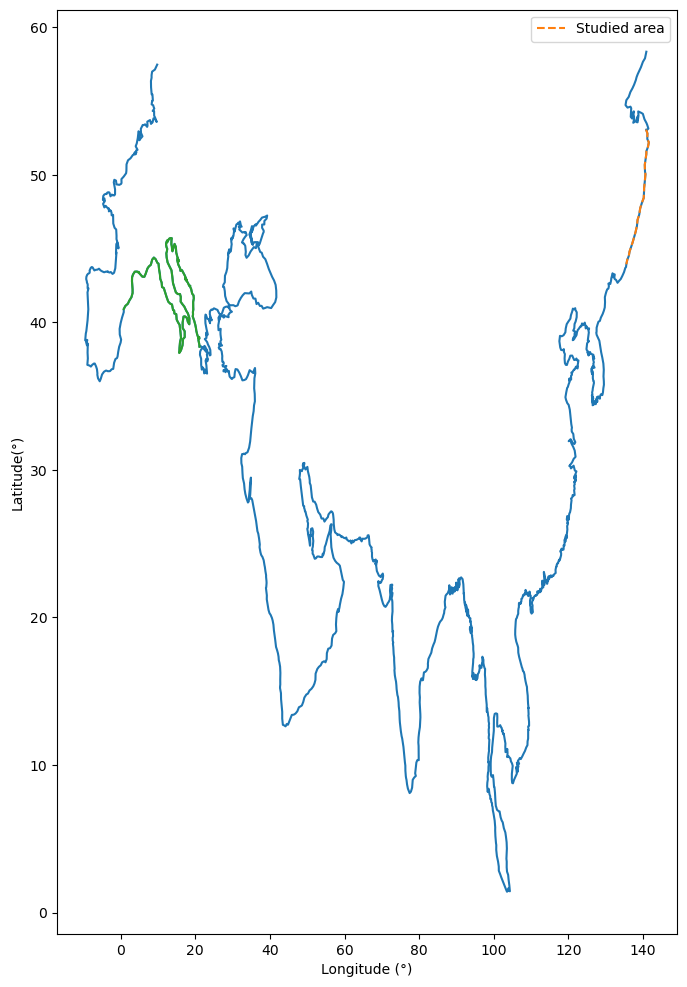

In [214]:
fig, ax = plt.subplots(figsize=(8, 12))
plt.plot(lon[indices_RU],lat[indices_RU])
plt.plot(lonX[150:180],latX[150:180],linestyle='--',label='Studied area')
plt.plot(lonX[1800:1950],latX[1800:1950])

plt.legend()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude(°)')

In [215]:
Serie_tempo_RU      = np.mean(Xshore_interpol[:,150:180],axis=1)
Serie_tempo_obs_RU   = np.mean(detrended_val[150:180],axis=0)

serie_tempo_IT    = np.mean(Xshore_interpol[:,1800:1950],axis=1)
serie_tempo_obs_IT = np.mean(detrended_val[1800:1950],axis=0)

In [216]:
corr_RU = np.corrcoef(Serie_tempo_RU,Serie_tempo_obs_RU)[0][1]
rmse_RU = PYSTATS.COMP_RMSE(Serie_tempo_obs_RU,Serie_tempo_RU)

corr_IT = np.corrcoef(serie_tempo_IT,serie_tempo_obs_IT)[0][1]
rmse_IT = PYSTATS.COMP_RMSE(serie_tempo_obs_IT,serie_tempo_IT)

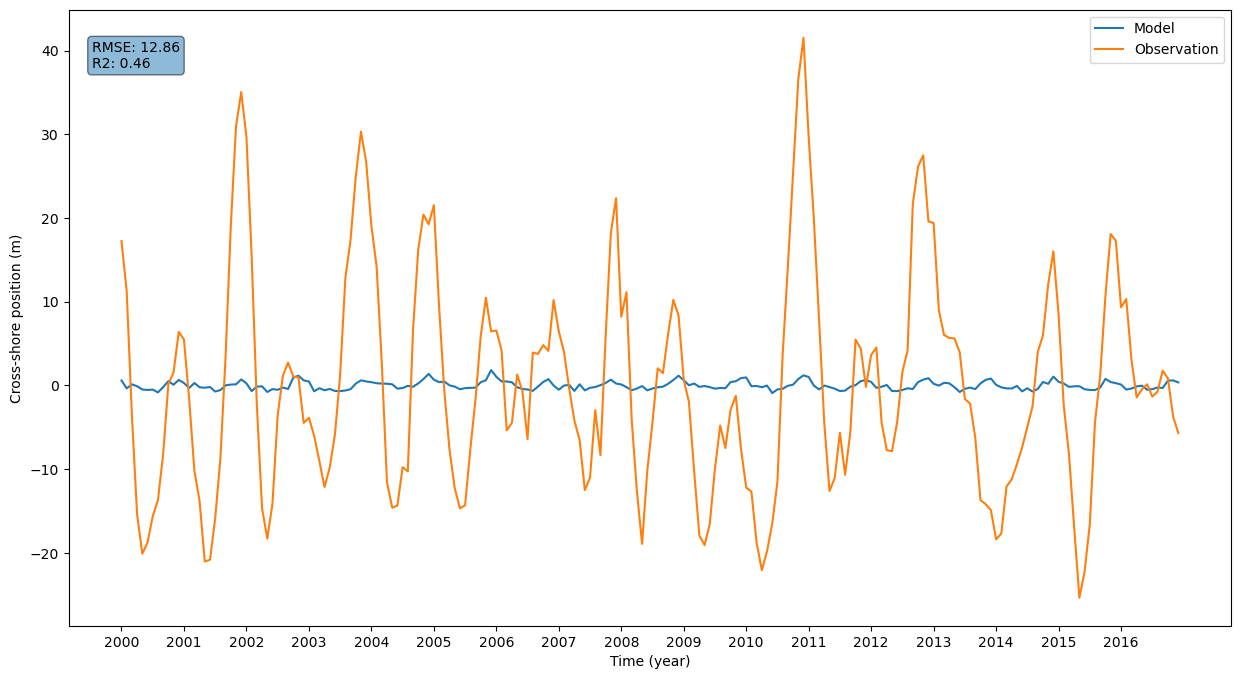

In [217]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), Serie_tempo_RU, label='Model')
plt.plot(range(months), Serie_tempo_obs_RU, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse_RU:.2f}\nR2: {corr_RU:.2f}'
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Cross-shore position (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

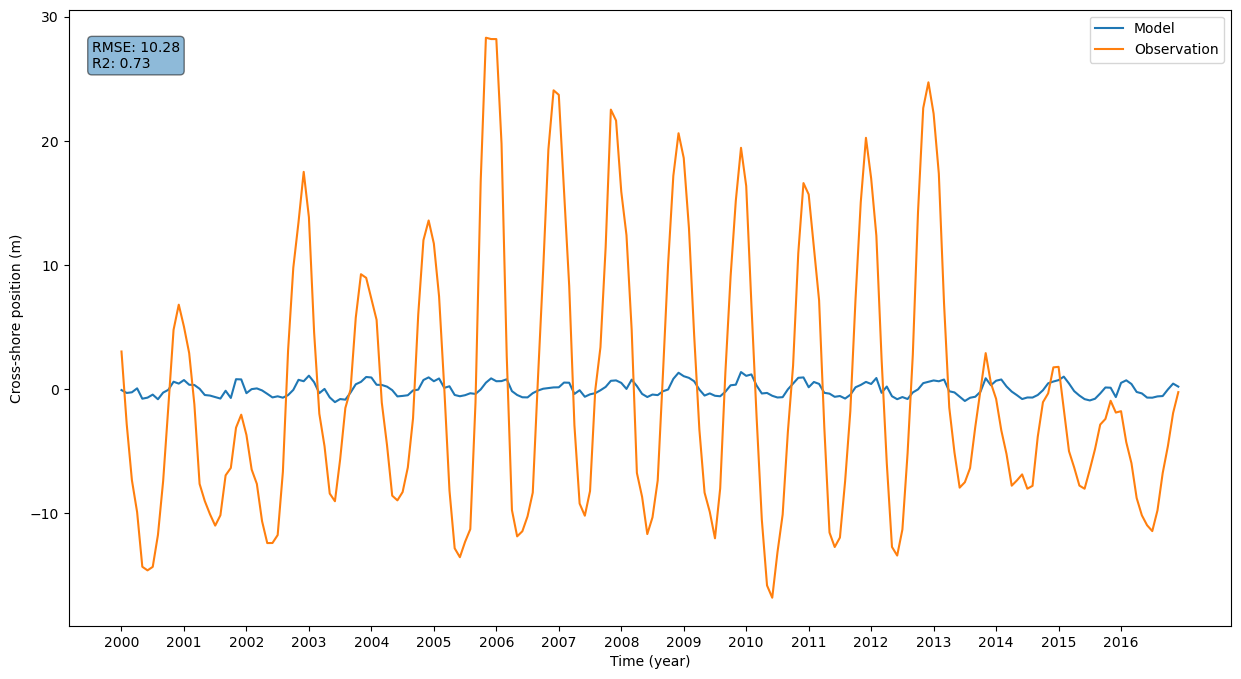

In [218]:
fig, ax = plt.subplots(figsize=(15, 8))

# Calculate the corresponding years for each month
years = [(start_year + i // 12) for i in range(months)]

plt.plot(range(months), serie_tempo_IT, label='Model')
plt.plot(range(months), serie_tempo_obs_IT, label='Observation')

# Ajoutez un carré avec les valeurs RMSE et R2
props = dict(boxstyle='round', alpha=0.5)
textstr = f'RMSE: {rmse_IT:.2f}\nR2: {corr_IT:.2f}'
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('Time (year)')  # Change the x-axis label to 'Year'
plt.ylabel('Cross-shore position (m)')
# plt.title('Temporal series of detrended Xshore')

# Set x-axis ticks and labels to display years only once for each year
plt.xticks(range(0, months, 12), years[:months:12])

plt.show()

# Correlation de mes series temporelles

In [219]:
from cmcrameri import cm

In [220]:
correlations = []
for i in range(len(x_new_concat)):
    correlation= np.corrcoef(Xshore_interpol[:,i],detrended_val[i])[0,1]
    correlations.append(correlation)

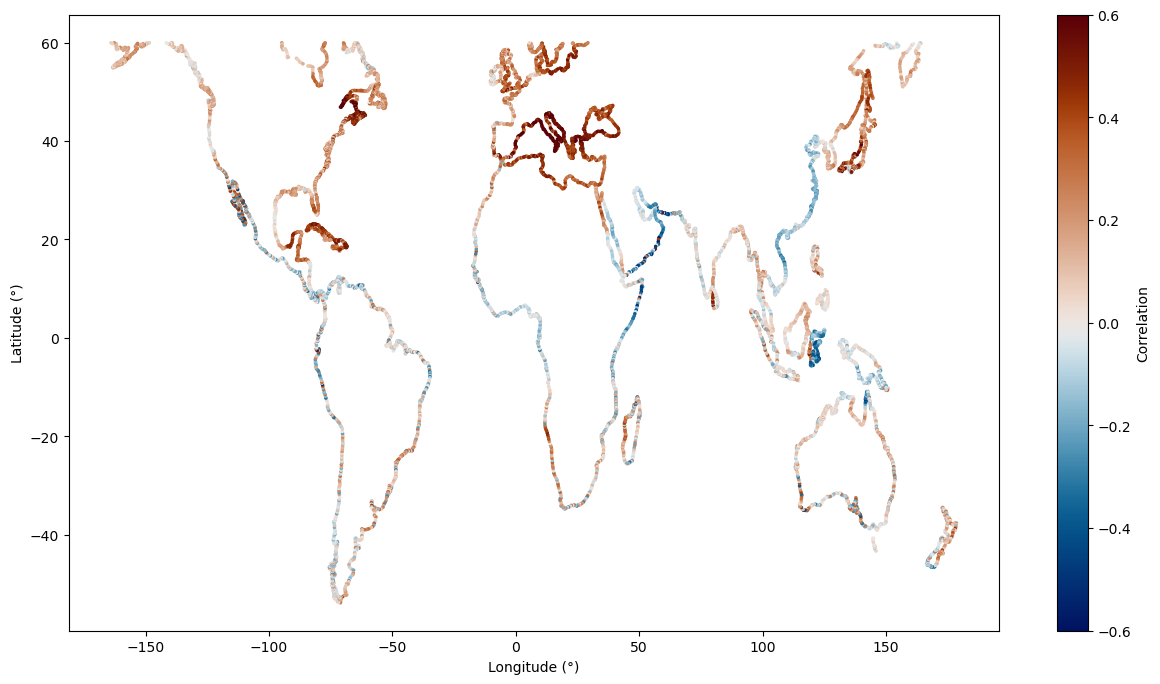

In [221]:
fig, ax = plt.subplots(figsize=(15, 8))
sc = ax.scatter(lon_glob, lat_glob, c=correlations,cmap=cm.vik,vmin=-0.6,vmax=0.6 ,s=2.5)

# Ajoutez une colorbar
cbar = plt.colorbar(sc, ax=ax, label='Correlation')

# Assurez-vous d'utiliser le bon axe pour les étiquettes et le titre
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Latitude (°)')
#x.set_title('Global correlation')

plt.show()

CLIMATOLOGIE SAISONNIERE

In [222]:
Xshore_sais = Xshore_interpol
print(Xshore_sais.shape)

(204, 8840)


In [223]:
Validation_sais = np.transpose(detrended_val)

In [224]:
print(Validation_sais.shape)

(204, 8840)


In [225]:
date_list= pd.date_range('2000-1-1','2016-12-31', freq='M').strftime("%Y-%m-%d")
date = pd.DatetimeIndex(date_list)

In [226]:
climato     = pd.DataFrame(Xshore_sais,index=date)
climato_val = pd.DataFrame(Validation_sais,index=date)

# CLIMATO SAISONNIERE

In [227]:
climato['Mois'] = climato.index.month
climato_val['Mois'] = climato_val.index.month

In [228]:
climato_saisonniere = climato.groupby('Mois').mean()
climato_saisonniere_val = climato_val.groupby('Mois').mean()

In [229]:
Nord = np.array(np.where(latX>0))
Sud  = np.array(np.where(latX<0))

In [230]:
donnees_Nord = climato_saisonniere[Nord[0]]
donnees_Sud  = climato_saisonniere[Sud[0]]

donnees_val_N = climato_saisonniere_val[Nord[0]]
donnees_val_S = climato_saisonniere_val[Sud[0]]

Text(0.5, 1.0, 'Seasonal cycle')

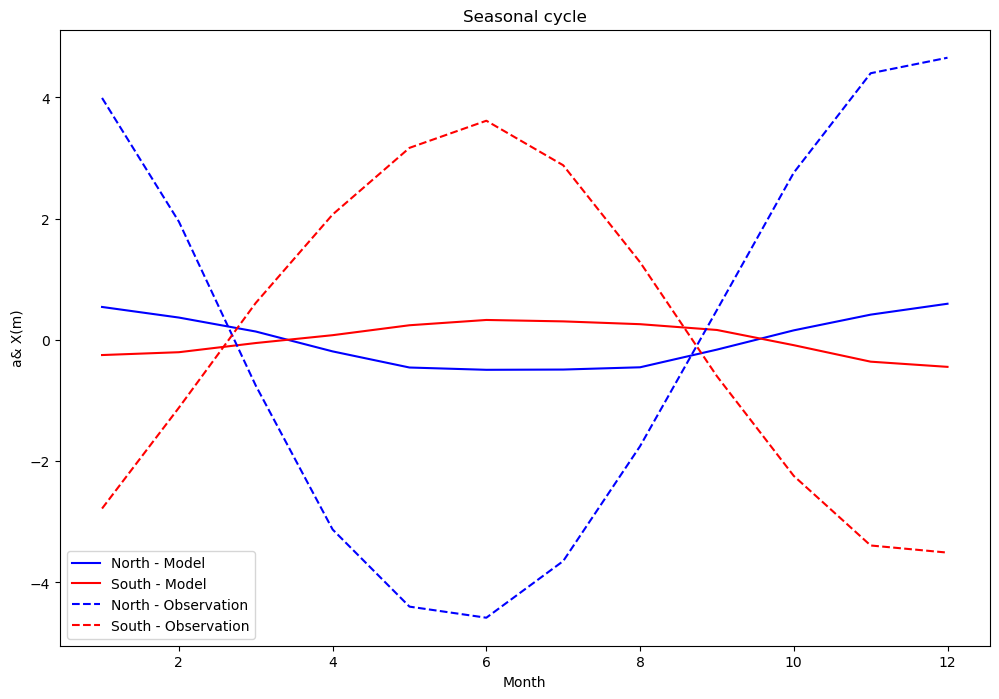

In [231]:
# Calcul de la moyenne par mois
mean_Nord = donnees_Nord.mean(axis=1)
mean_Sud  = donnees_Sud.mean(axis=1)
mean_Nord_val = donnees_val_N.mean(axis=1)
mean_Sud_val  = donnees_val_S.mean(axis=1)

fig,ax = plt.subplots(figsize=(12,8))
# Tracé du cycle saisonnier
plt.plot(climato_saisonniere.index, mean_Nord,c='blue',label='North - Model')
plt.plot(climato_saisonniere.index,mean_Sud,c='red',label='South - Model')

plt.plot(climato_saisonniere_val.index, mean_Nord_val,c='blue',linestyle='--',label='North - Observation')
plt.plot(climato_saisonniere_val.index,mean_Sud_val,c='red',linestyle='--',label='South - Observation')
# Ajout d'étiquettes et d'un titre au graphique
plt.xlabel('Month')
plt.ylabel('a& X(m)')
plt.legend()
plt.title('Seasonal cycle')


In [232]:
# Trouver le mois avec la valeur maximale pour chaque position
mois_max_par_position = climato_saisonniere.astype(float).idxmax()
mois_max_par_position_val = climato_saisonniere_val.astype(float).idxmax()

print(mois_max_par_position_val)

0        3
1        9
2        9
3        9
4       10
        ..
8835     2
8836    11
8837    11
8838    11
8839     8
Length: 8840, dtype: int64


In [233]:
from matplotlib.colors import LinearSegmentedColormap

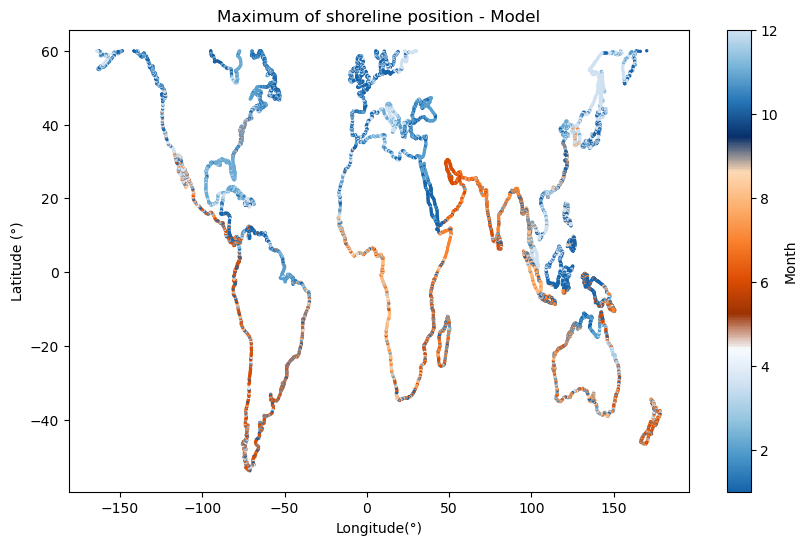

In [234]:
# Définir un colormap personnalisé
cmap_winter = plt.get_cmap('Blues_r')
cmap_summer = plt.get_cmap('Oranges_r')
colors_winter = cmap_winter(np.linspace(0.2, 1, 5))  # Pour les mois de 1 à 4 (exclure le blanc)
colors_summer = cmap_summer(np.linspace(0.1, 0.8, 5))  # Pour les mois de 5 à 8 (exclure le blanc)
colors_autumn = cmap_winter(np.linspace(0, 0.8, 4))  # Pour les mois de 9 à 12
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', np.vstack((colors_winter, colors_summer, colors_autumn)))

# Créer un plot avec le colormap personnalisé
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lonX,latX,
                      c=mois_max_par_position.values, cmap=custom_cmap, s=2)
plt.colorbar(scatter, label='Month')
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude (°)')
plt.title('Maximum of shoreline position - Model')
plt.show()

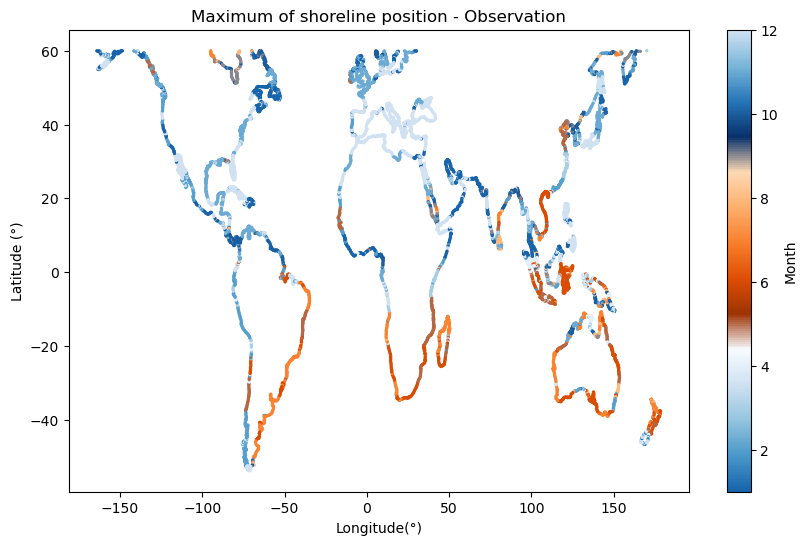

In [235]:
# Définir un colormap personnalisé
cmap_winter = plt.get_cmap('Blues_r')
cmap_summer = plt.get_cmap('Oranges_r')
colors_winter = cmap_winter(np.linspace(0.2, 1, 5))  # Pour les mois de 1 à 4 (exclure le blanc)
colors_summer = cmap_summer(np.linspace(0.1, 0.8, 5))  # Pour les mois de 5 à 8 (exclure le blanc)
colors_autumn = cmap_winter(np.linspace(0, 0.8, 4))  # Pour les mois de 9 à 12
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', np.vstack((colors_winter, colors_summer, colors_autumn)))

# Créer un plot avec le colormap personnalisé
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lonX,latX,
                      c=mois_max_par_position_val.values, cmap=custom_cmap, s=2)
plt.colorbar(scatter, label='Month')
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude (°)')
plt.title('Maximum of shoreline position - Observation')
plt.show()

In [236]:
# Calculer l'écart-type pour chaque mois et chaque position
monthly_std_mod = climato_saisonniere.std(axis=0)
monthly_amplitude_mod = 4*monthly_std_mod

monthly_std_obs = climato_saisonniere_val.std(axis=0)
monthly_amplitude_obs = 4*monthly_std_obs

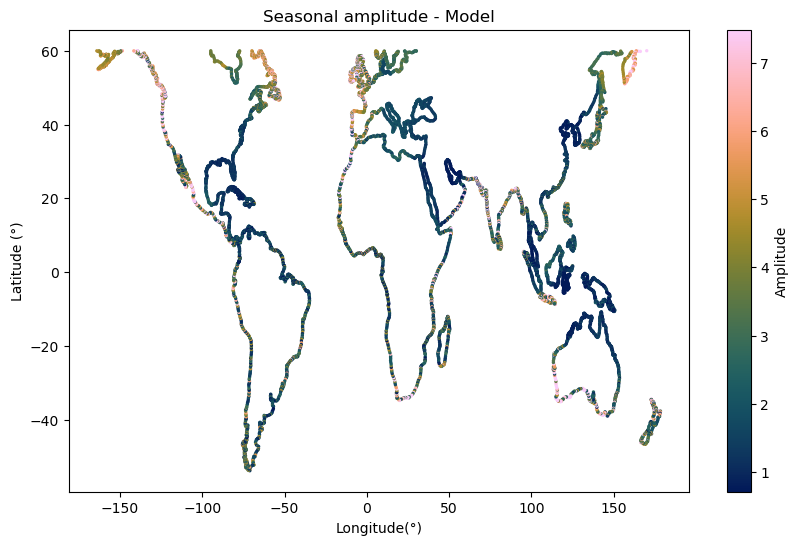

In [237]:
# Créer un plot avec le colormap personnalisé
perc_5_amod = np.percentile(monthly_amplitude_mod,5)
perc_95_amod = np.percentile(monthly_amplitude_mod,95)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lonX,latX,
                      c=monthly_amplitude_mod.values,vmin=perc_5_amod,vmax=perc_95_amod, cmap=cm.batlow, s=2)
plt.colorbar(scatter, label='Amplitude')
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude (°)')
plt.title('Seasonal amplitude - Model')
plt.show()

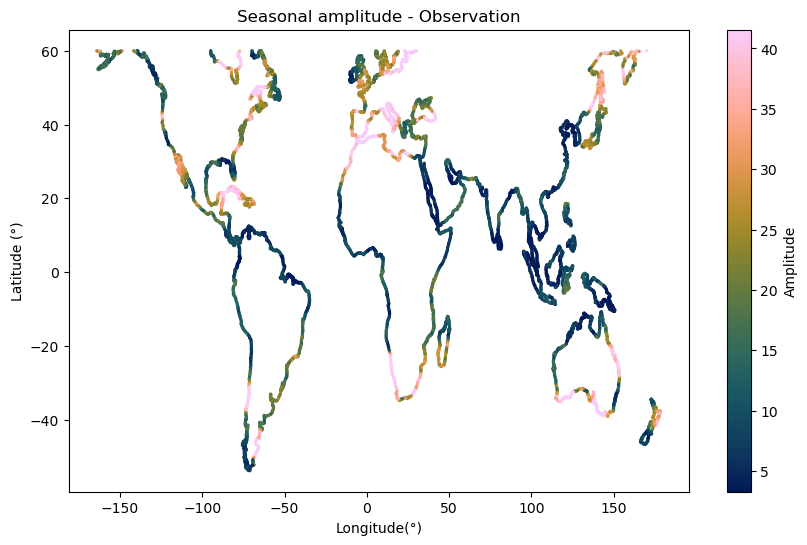

In [238]:
# Créer un plot avec le colormap personnalisé
perc_5_amob = np.percentile(monthly_amplitude_obs,5)
perc_95_amob = np.percentile(monthly_amplitude_obs,95)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(lonX,latX,
                      c=monthly_amplitude_obs.values,vmin=perc_5_amob,vmax=perc_95_amob, cmap=cm.batlow, s=2)
plt.colorbar(scatter, label='Amplitude')
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude (°)')
plt.title('Seasonal amplitude - Observation')
plt.show()

# CLIMATO INTERANNUELLE

In [239]:
climato['Years'] = climato.index.year
climato_val['Years'] = climato_val.index.year

climato_interannuelle = climato.groupby('Years').mean()
climato_interannuelle_val = climato_val.groupby('Years').mean()

In [240]:
donnees_Nord_IA = climato_interannuelle[Nord[0]]
donnees_Sud_IA  = climato_interannuelle[Sud[0]]

donnees_val_N_IA = climato_interannuelle_val[Nord[0]]
donnees_val_S_IA = climato_interannuelle_val[Sud[0]]

Text(0.5, 1.0, 'Interannual cycle')

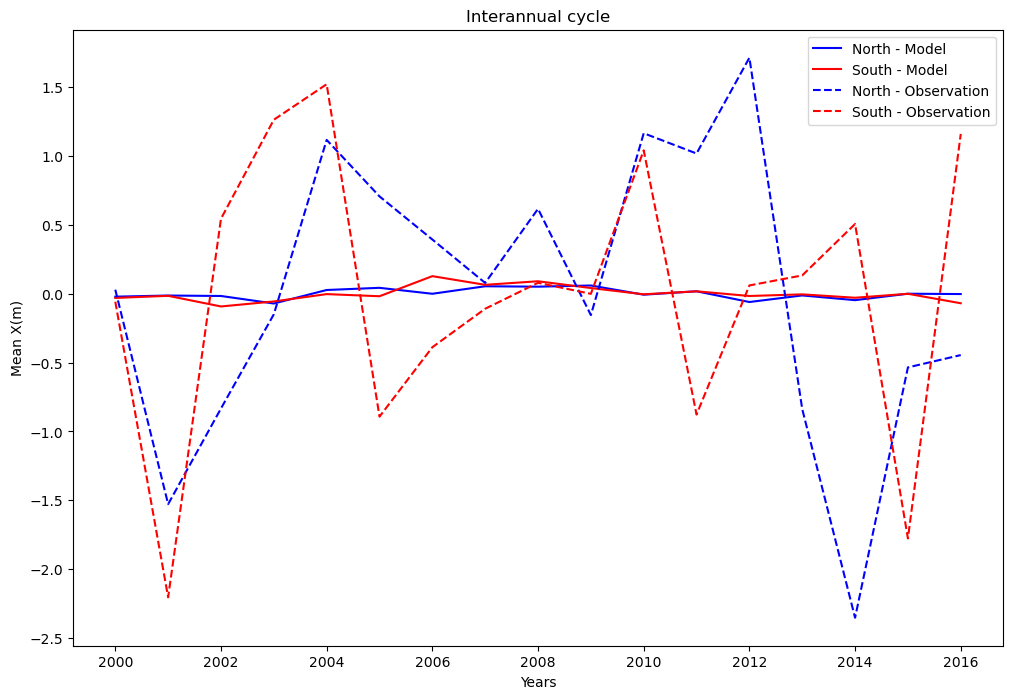

In [241]:
# Calcul de la moyenne par mois
mean_Nord_IA = donnees_Nord_IA.mean(axis=1)
mean_Sud_IA  = donnees_Sud_IA.mean(axis=1)
mean_Nord_val_IA = donnees_val_N_IA.mean(axis=1)
mean_Sud_val_IA  = donnees_val_S_IA.mean(axis=1)

fig,ax = plt.subplots(figsize=(12,8))
# Tracé du cycle saisonnier
plt.plot(climato_interannuelle.index, mean_Nord_IA,c='blue',label='North - Model')
plt.plot(climato_interannuelle.index,mean_Sud_IA,c='red',label='South - Model')

plt.plot(climato_interannuelle_val.index, mean_Nord_val_IA,c='blue',linestyle='--',label='North - Observation')
plt.plot(climato_interannuelle_val.index,mean_Sud_val_IA,c='red',linestyle='--',label='South - Observation')
# Ajout d'étiquettes et d'un titre au graphique
plt.xlabel('Years')
plt.ylabel('Mean X(m)')
plt.legend()
plt.title('Interannual cycle')


In [242]:
# Calculer l'écart-type pour chaque mois et chaque position
interA_std_mod = climato_interannuelle.std(axis=0)
interA_amplitude_mod = 4*interA_std_mod

print(interA_amplitude_mod.shape)

interA_std_obs = climato_interannuelle_val.std(axis=0)
interA_amplitude_obs = 4*interA_std_obs

(8841,)


ValueError: 'c' argument has 8841 elements, which is inconsistent with 'x' and 'y' with size 8857.

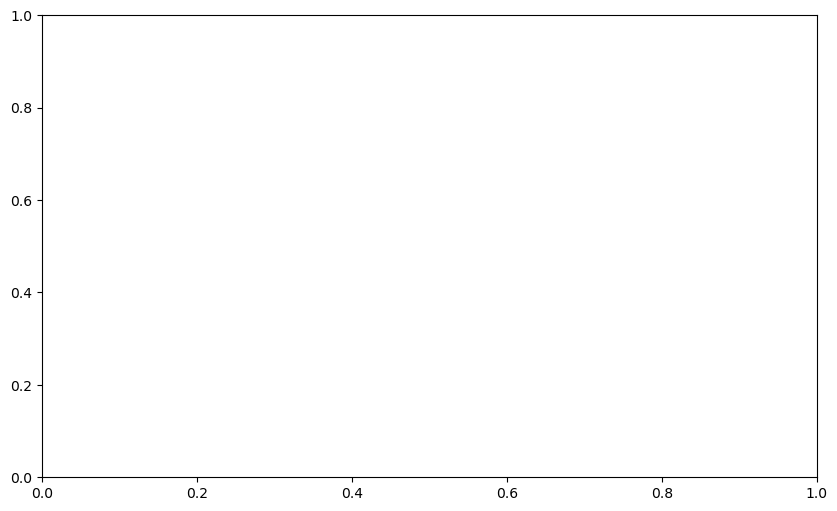

In [243]:
# Créer un plot avec le colormap personnalisé
perc_5_amod_IA = np.percentile(interA_amplitude_mod,5)
perc_95_amod_IA = np.percentile(interA_amplitude_mod,95)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(lon,lat,
                      c=interA_amplitude_mod.values,vmin=perc_5_amod_IA,vmax=perc_95_amod_IA, cmap=cm.batlow, s=2)
plt.colorbar(scatter, label='Amplitude')
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude (°)')
plt.title('Interannual amplitude - Model')
plt.show()

# SAVE ALL DATASETS
